<a href="https://colab.research.google.com/github/byarciptap/Credit_Risk_Analysis_using_Base_Tree_Models/blob/main/Predictive_Modelling_for_Credit_Risk_Analysis_using_Base_Tree_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predictive Modelling for Credit Risk Analysis using Base Tree Models**

# **About this Project**

Background :
* Perusahaan pemberi pinjaman (lending company) memiliki sejumlah besar data pinjaman yang diterima dan ditolak. Mereka ingin mengoptimalkan proses pengambilan keputusan kredit dengan memanfaatkan data yang ada.

Challenge :    
* Perusahaan ingin meminimalkan risiko kredit dengan mengidentifikasi pinjaman yang berpotensi bermasalah sebelum disetujui, sehingga mengurangi kerugian dan meningkatkan profitabilitas.

Objective :
* Membangun Model Prediksi Risiko Kredit
* Evaluasi Model
* Mengembangkan Alat Keputusan
* Optimasi Proses Persetujuan Kredit

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
pd.set_option('display.max_columns', None) # Menampilkan dataframe full kolom
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan

# Data Preparation
Pada tahap ini, kita melakukan persiapan data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/VIX Rakamin - IDX Partners/loan_data_2007_2014.csv'
df_og = pd.read_csv(path)
df = df_og.copy(deep=True)

<ipython-input-3-7d5033712360>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_og = pd.read_csv(path)


In [ ]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
df.describe(include='all')

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285,466285.000000,466285.000000,466285,466285,438697,445277,466285,4.662810e+05,466285,466285,466285,466285,466285,125983,466285,466265,466285,466285,466285.000000,466256.000000,466256,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,465909,466285.000000,239071,466243,466140.000000,98974.000000,466285.0,466285,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,205475,11,6,NaN,3,91,9,2,466285,124436,14,63099,888,50,NaN,NaN,664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,100,103,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,NaN,NaN,Oct-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan-16,NaN,Feb-16,Jan-16,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,337953,NaN,NaN,136929,31686,5399,150049,235875,NaN,168055,38782,224226,466276,1,234,274195,164075,5304,71450,NaN,NaN,3674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179620,NaN,208393,327699,NaN,NaN,NaN,466285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,NaN,13.829236,432.061201,NaN,NaN,NaN,NaN,NaN,7.327738e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.218758,0.284678,NaN,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,NaN,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,NaN,3123.913796,NaN,NaN,0.009085,42.852547,1.0,NaN,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,NaN,4.357587,243.485550,NaN,NaN,NaN,NaN,NaN,5.496357e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.851121,0.797365,NaN,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,NaN,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,NaN,5554.737393,NaN,NaN,0.108648,21.662591,0.0,NaN,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,NaN,5.420000,15.670000,NaN,NaN,NaN,NaN,NaN,1.896000e+03,NaN,NaN,Na

In [ ]:
# Check duplicate rows
duplicate_rows = df[df.duplicated(subset=['id', 'member_id'], keep='first')]
duplicate_rows

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m


from this code we know that all of the id and member_id are unique, so we don't have a duplicate rows

# Feature Selection

In [ ]:
# Choose relevant column (exclude identifier column, irrelevant column and null column)
relevant_column = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
                   'installment', 'grade', 'emp_length',
                   'home_ownership', 'annual_inc', 'verification_status',
                   'loan_status', 'pymnt_plan', 'purpose', 'dti', 'delinq_2yrs',
                   'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'out_prncp',
                   'collections_12_mths_ex_med', 'acc_now_delinq']
df_filtered = df[relevant_column]

In [ ]:
# Membuat kolom 'loan_active' berdasarkan kondisi
df_filtered['loan_active'] = df_filtered['loan_status'].apply(lambda x: 'Yes' if x in ['Current', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)'] else 'No')

# Data Preprocessing part 1

In [ ]:
#Check the number of unique value from all of the object datatype
df_filtered.select_dtypes(include='object').nunique()

term                    2
grade                   7
emp_length             11
home_ownership          6
verification_status     3
loan_status             9
pymnt_plan              2
purpose                14
loan_active             2
dtype: int64

## Segment Grade into smaller unique value

In [ ]:
df_filtered.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [ ]:
def map_grade(category):
    if category in ['A']:
        return 'A' # Kelompook Terbaik
    elif category in ['B','C']:
        return 'B' # Kelompok Baik
    elif category in ['D','E']:
        return 'C' # Kelompok Sedang
    else:
        return 'D' # Kelompok Buruk

# Apply the function to the 'emp_length' column
df_filtered['grade'] = df_filtered['grade'].apply(map_grade)

<Axes: >

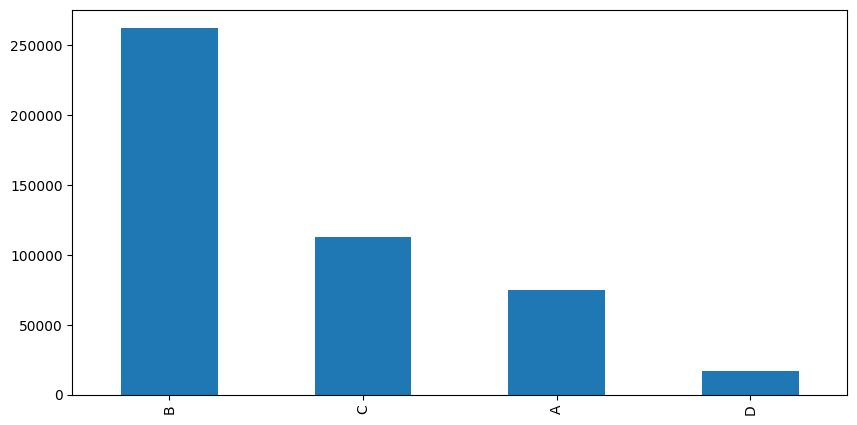

In [ ]:
plt.figure(figsize=(10,5))
df_filtered['grade'].value_counts().plot(kind='bar')

## Segment Emp Length into smaller unique value

In [ ]:
df_filtered.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [ ]:
def map_emp_length(category):
    if pd.isna(category):
        return 'Unspecified'
    elif category in ['< 1 year', '1 year']:
        return '0-1 year'
    elif category in ['2 years','3 years','4 years']:
        return '2-4 years'
    elif category in ['5 years','6 years','7 years','8 years','9 years']:
        return '5-9 years'
    else:
        return '10+ years'

# Apply the function to the 'emp_length' column
df_filtered['emp_length'] = df_filtered['emp_length'].apply(map_emp_length)

<Axes: >

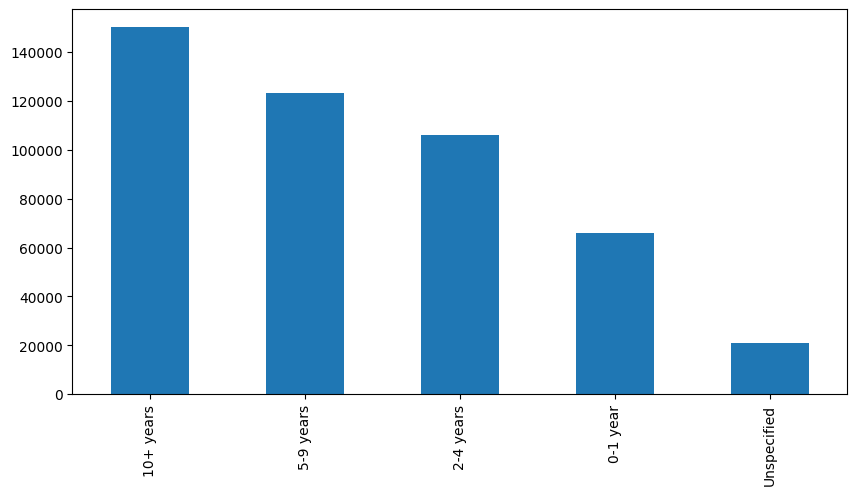

In [ ]:
plt.figure(figsize=(10,5))
df_filtered['emp_length'].value_counts().plot(kind='bar')

## Segment Home Ownership into smaller unique Value

In [ ]:
df_filtered.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [ ]:
def map_home(category):
    if category in ['RENT']:
        return 'RENT'  # Peminjam tinggal dalam rumah sewa
    elif category in ['OWN']:
        return 'OWNED'  # Peminjam tinggal di rumah sendiri
    elif category in ['MORTGAGE']:
        return 'MORTGAGE'  # Peminjam tinggal di rumah hipotek
    else:
        return 'OTHER'  # Situasi peminjam tidak dapat dikategorikan

# Apply the function to the 'home_ownership' column
df_filtered['home_ownership'] = df_filtered['home_ownership'].apply(map_home)

<Axes: >

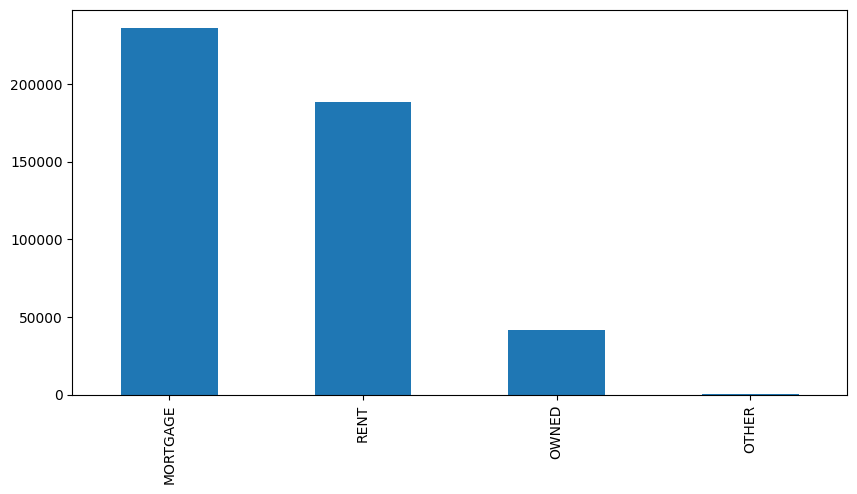

In [ ]:
plt.figure(figsize=(10,5))
df_filtered['home_ownership'].value_counts().plot(kind='bar')

## Segment Loan Status into smaller unique value

In [ ]:
df_filtered.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [ ]:
def map_loan_status(category):
    if category in ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid','Current','In Grace Period']:
        return 'Non-Default'
    else:
        return 'Default'

# Apply the function to the 'emp_length' column
df_filtered['loan_status'] = df_filtered['loan_status'].apply(map_loan_status)

<Axes: >

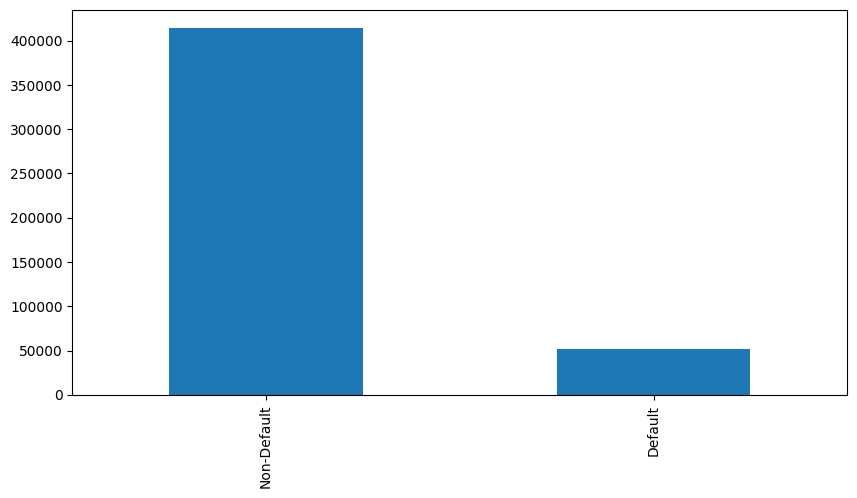

In [ ]:
plt.figure(figsize=(10,5))
df_filtered['loan_status'].value_counts().plot(kind='bar')

## Segment Purpose into smaller unique value

In [ ]:
df_filtered.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [ ]:
def map_purpose(category):
    if category in ['debt_consolidation']:
        return 'Debt Consolidation'
    elif category in ['home_improvement','house']:
        return 'Home Expenses'
    elif category in ['major_purchase','car']:
        return 'Major Purchases'
    elif category in ['medical']:
        return 'Medical Expenses'
    elif category in ['small_business', 'educational']:
        return 'Business and Education'
    else:
        return 'Other'

# Apply the function to the 'emp_length' column
df_filtered['purpose'] = df_filtered['purpose'].apply(map_purpose)

<Axes: >

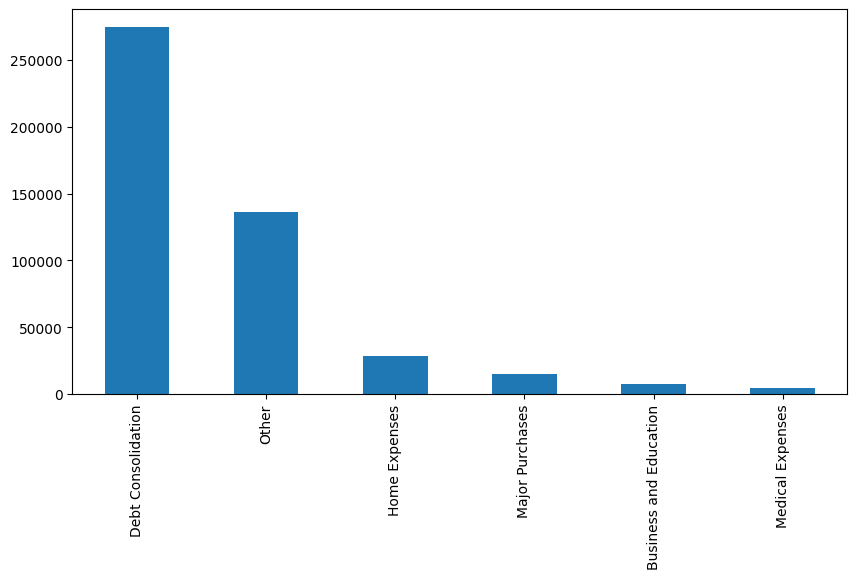

In [ ]:
plt.figure(figsize=(10,5))
df_filtered['purpose'].value_counts().plot(kind='bar')

In [ ]:
df_filtered.select_dtypes(include='object').nunique()

term                   2
grade                  4
emp_length             5
home_ownership         4
verification_status    3
loan_status            2
pymnt_plan             2
purpose                6
loan_active            2
dtype: int64

# Data Overview

In [ ]:
df_filtered.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,out_prncp,collections_12_mths_ex_med,acc_now_delinq,loan_active
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Non-Default,n,Other,27.65,0.0,1.0,3.0,0.0,13648,0.0,0.0,0.0,No
1,2500,2500,2500.0,60 months,15.27,59.83,B,0-1 year,RENT,30000.0,Source Verified,Default,n,Major Purchases,1.00,0.0,5.0,3.0,0.0,1687,0.0,0.0,0.0,No
2,2400,2400,2400.0,36 months,15.96,84.33,B,10+ years,RENT,12252.0,Not Verified,Non-Default,n,Business and Education,8.72,0.0,2.0,2.0,0.0,2956,0.0,0.0,0.0,No
3,10000,10000,10000.0,36 months,13.49,339.31,B,10+ years,RENT,49200.0,Source Verified,Non-Default,n,Other,20.00,0.0,1.0,10.0,0.0,5598,0.0,0.0,0.0,No
4,3000,3000,3000.0,60 months,12.69,67.79,B,0-1 year,RENT,80000.0,Source Verified,Non-Default,n,Other,17.94,0.0,0.0,15.0,0.0,27783,766.9,0.0,0.0,Yes


# Exploratory Data Analys

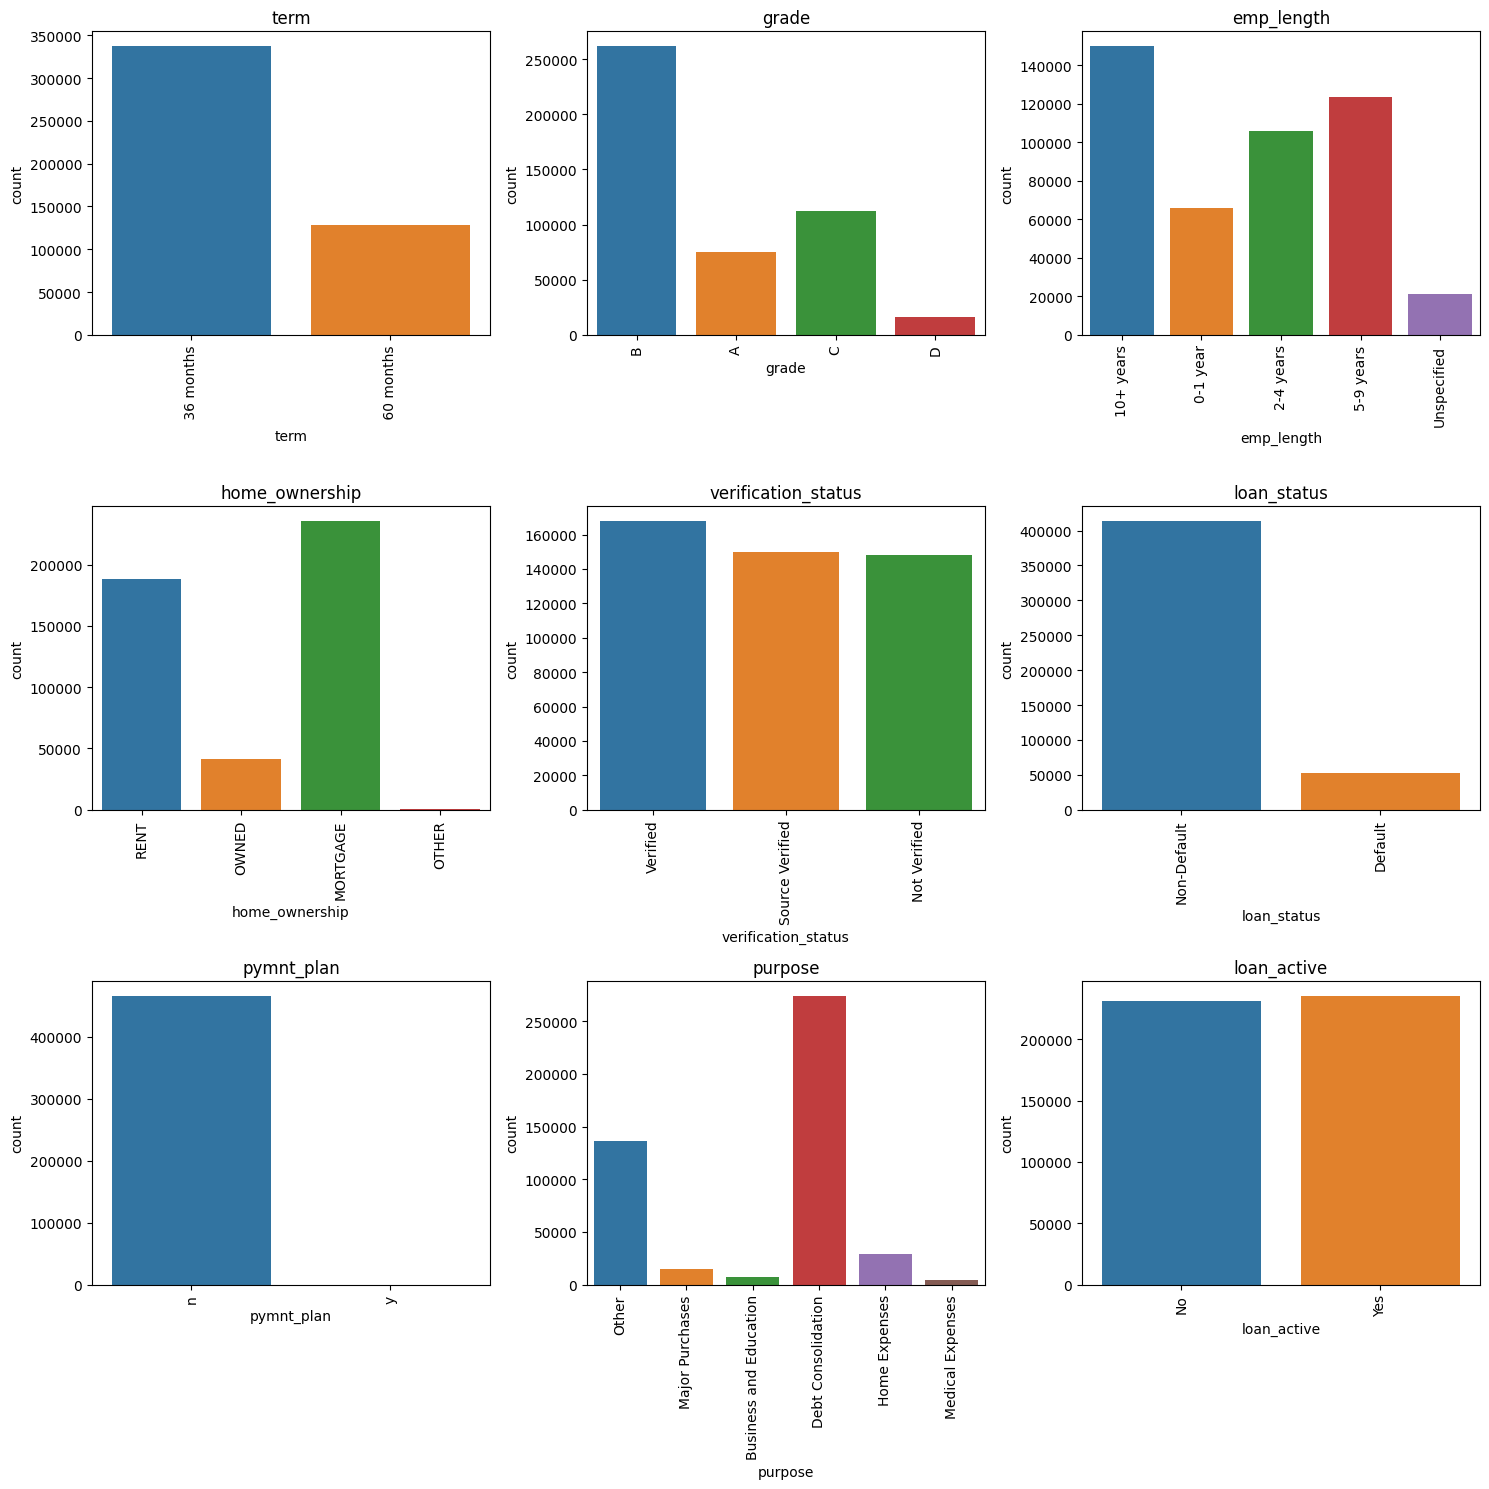

In [ ]:
# Get the names of all columns with data type 'object' (categorical columns) excluding 'Country'
cat_vars = df_filtered.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for the top 6 values of each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    top_values = df_filtered[var].value_counts().index
    filtered_df = df_filtered[df_filtered[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

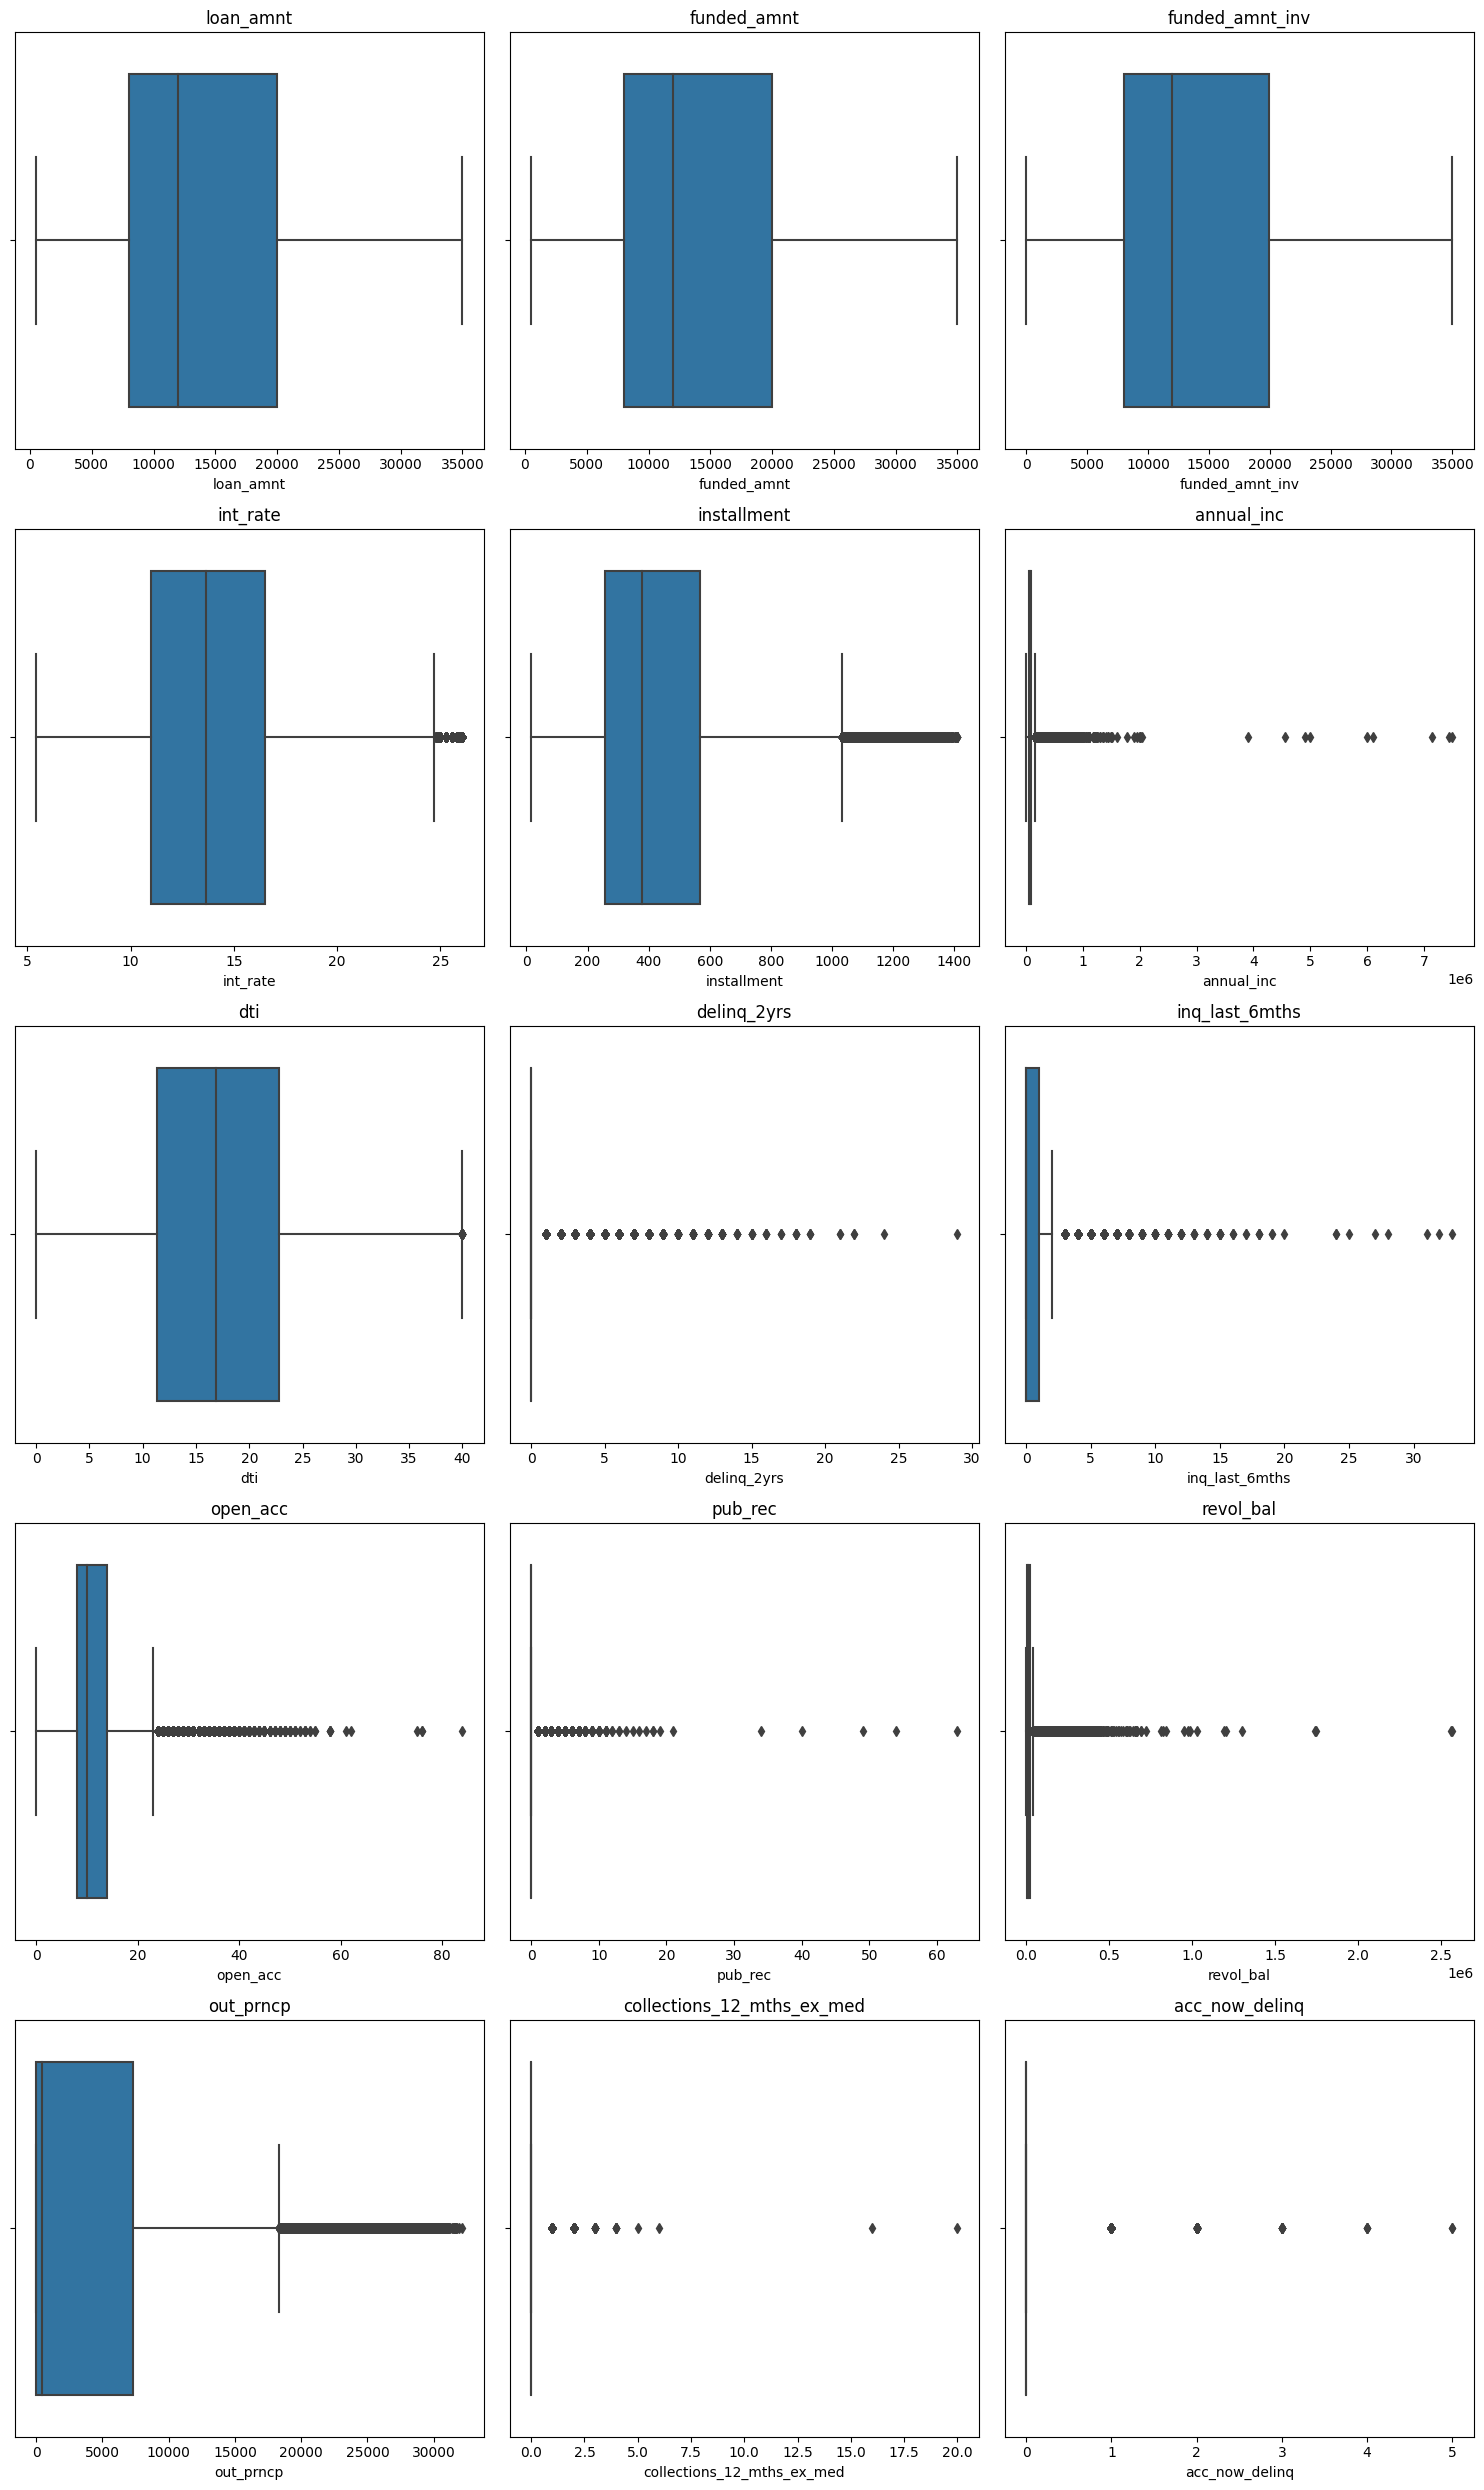

In [ ]:
# Get the names of all columns with data type 'int' or 'float', excluding the specified columns
num_vars = df_filtered.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=df_filtered[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

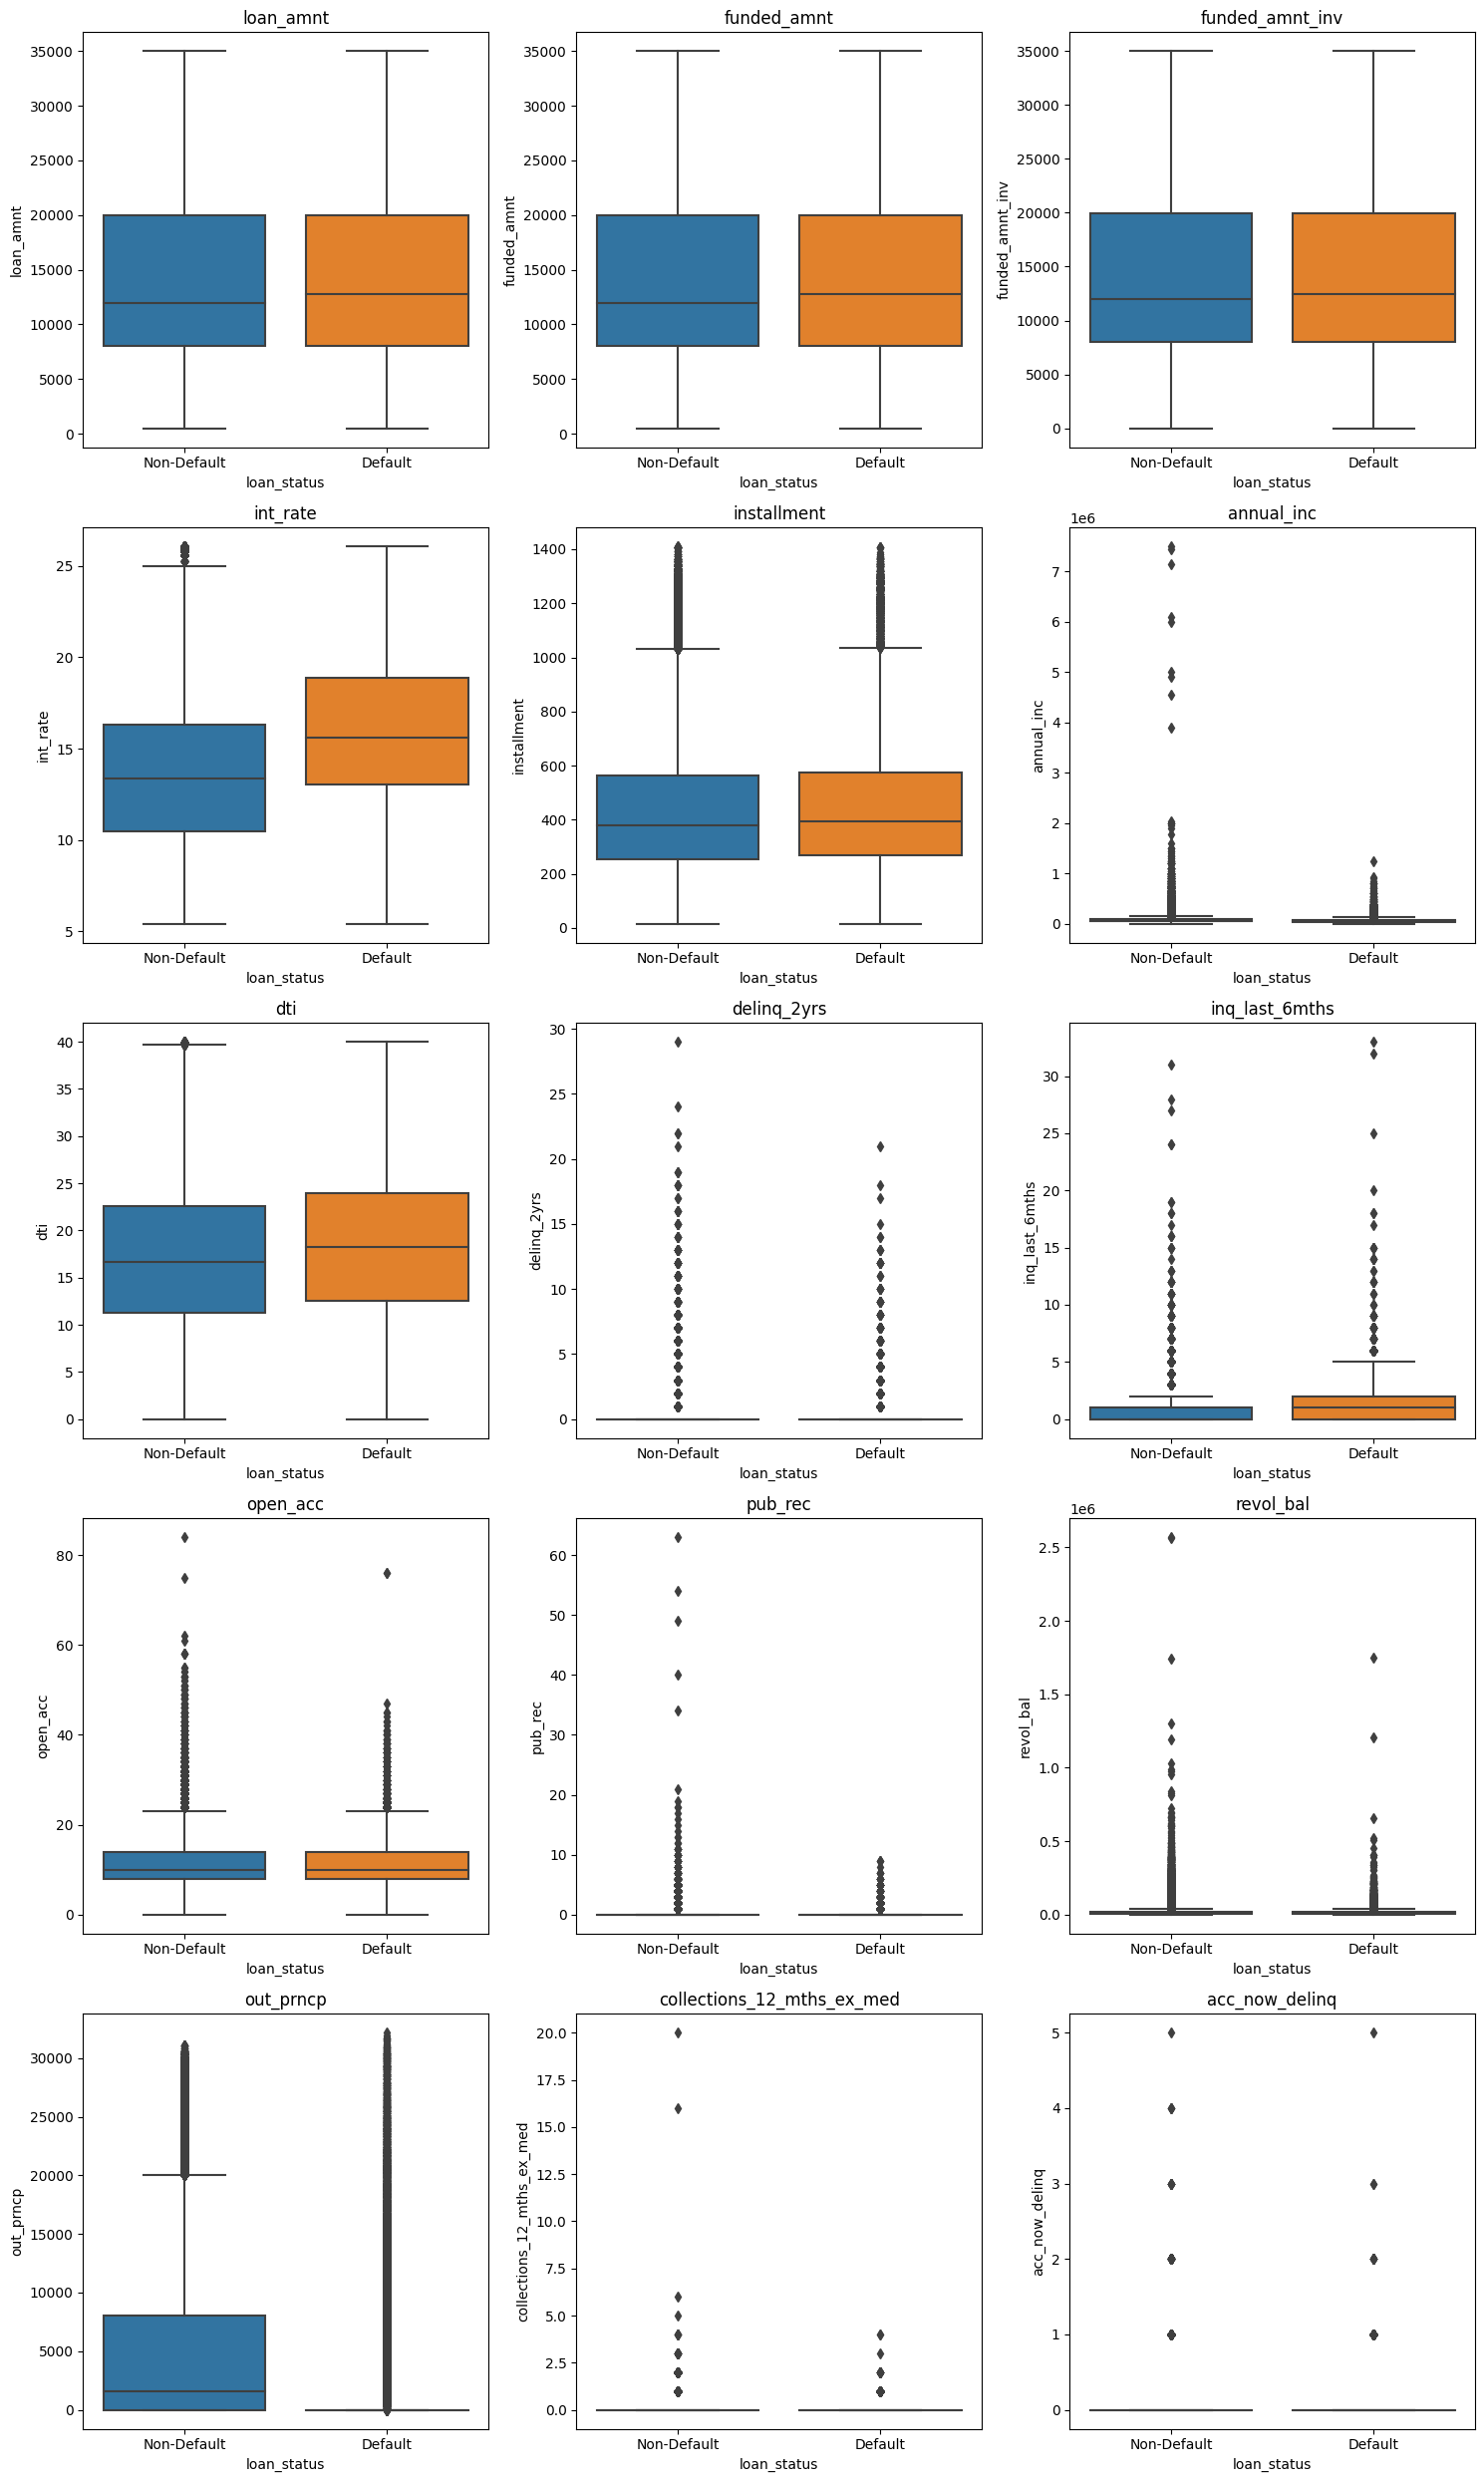

In [ ]:
# Get the names of all columns with data type 'int'
int_vars = df_filtered.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='loan_status'
for i, var in enumerate(int_vars):
    sns.boxplot(y=var, x='loan_status', data=df_filtered, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

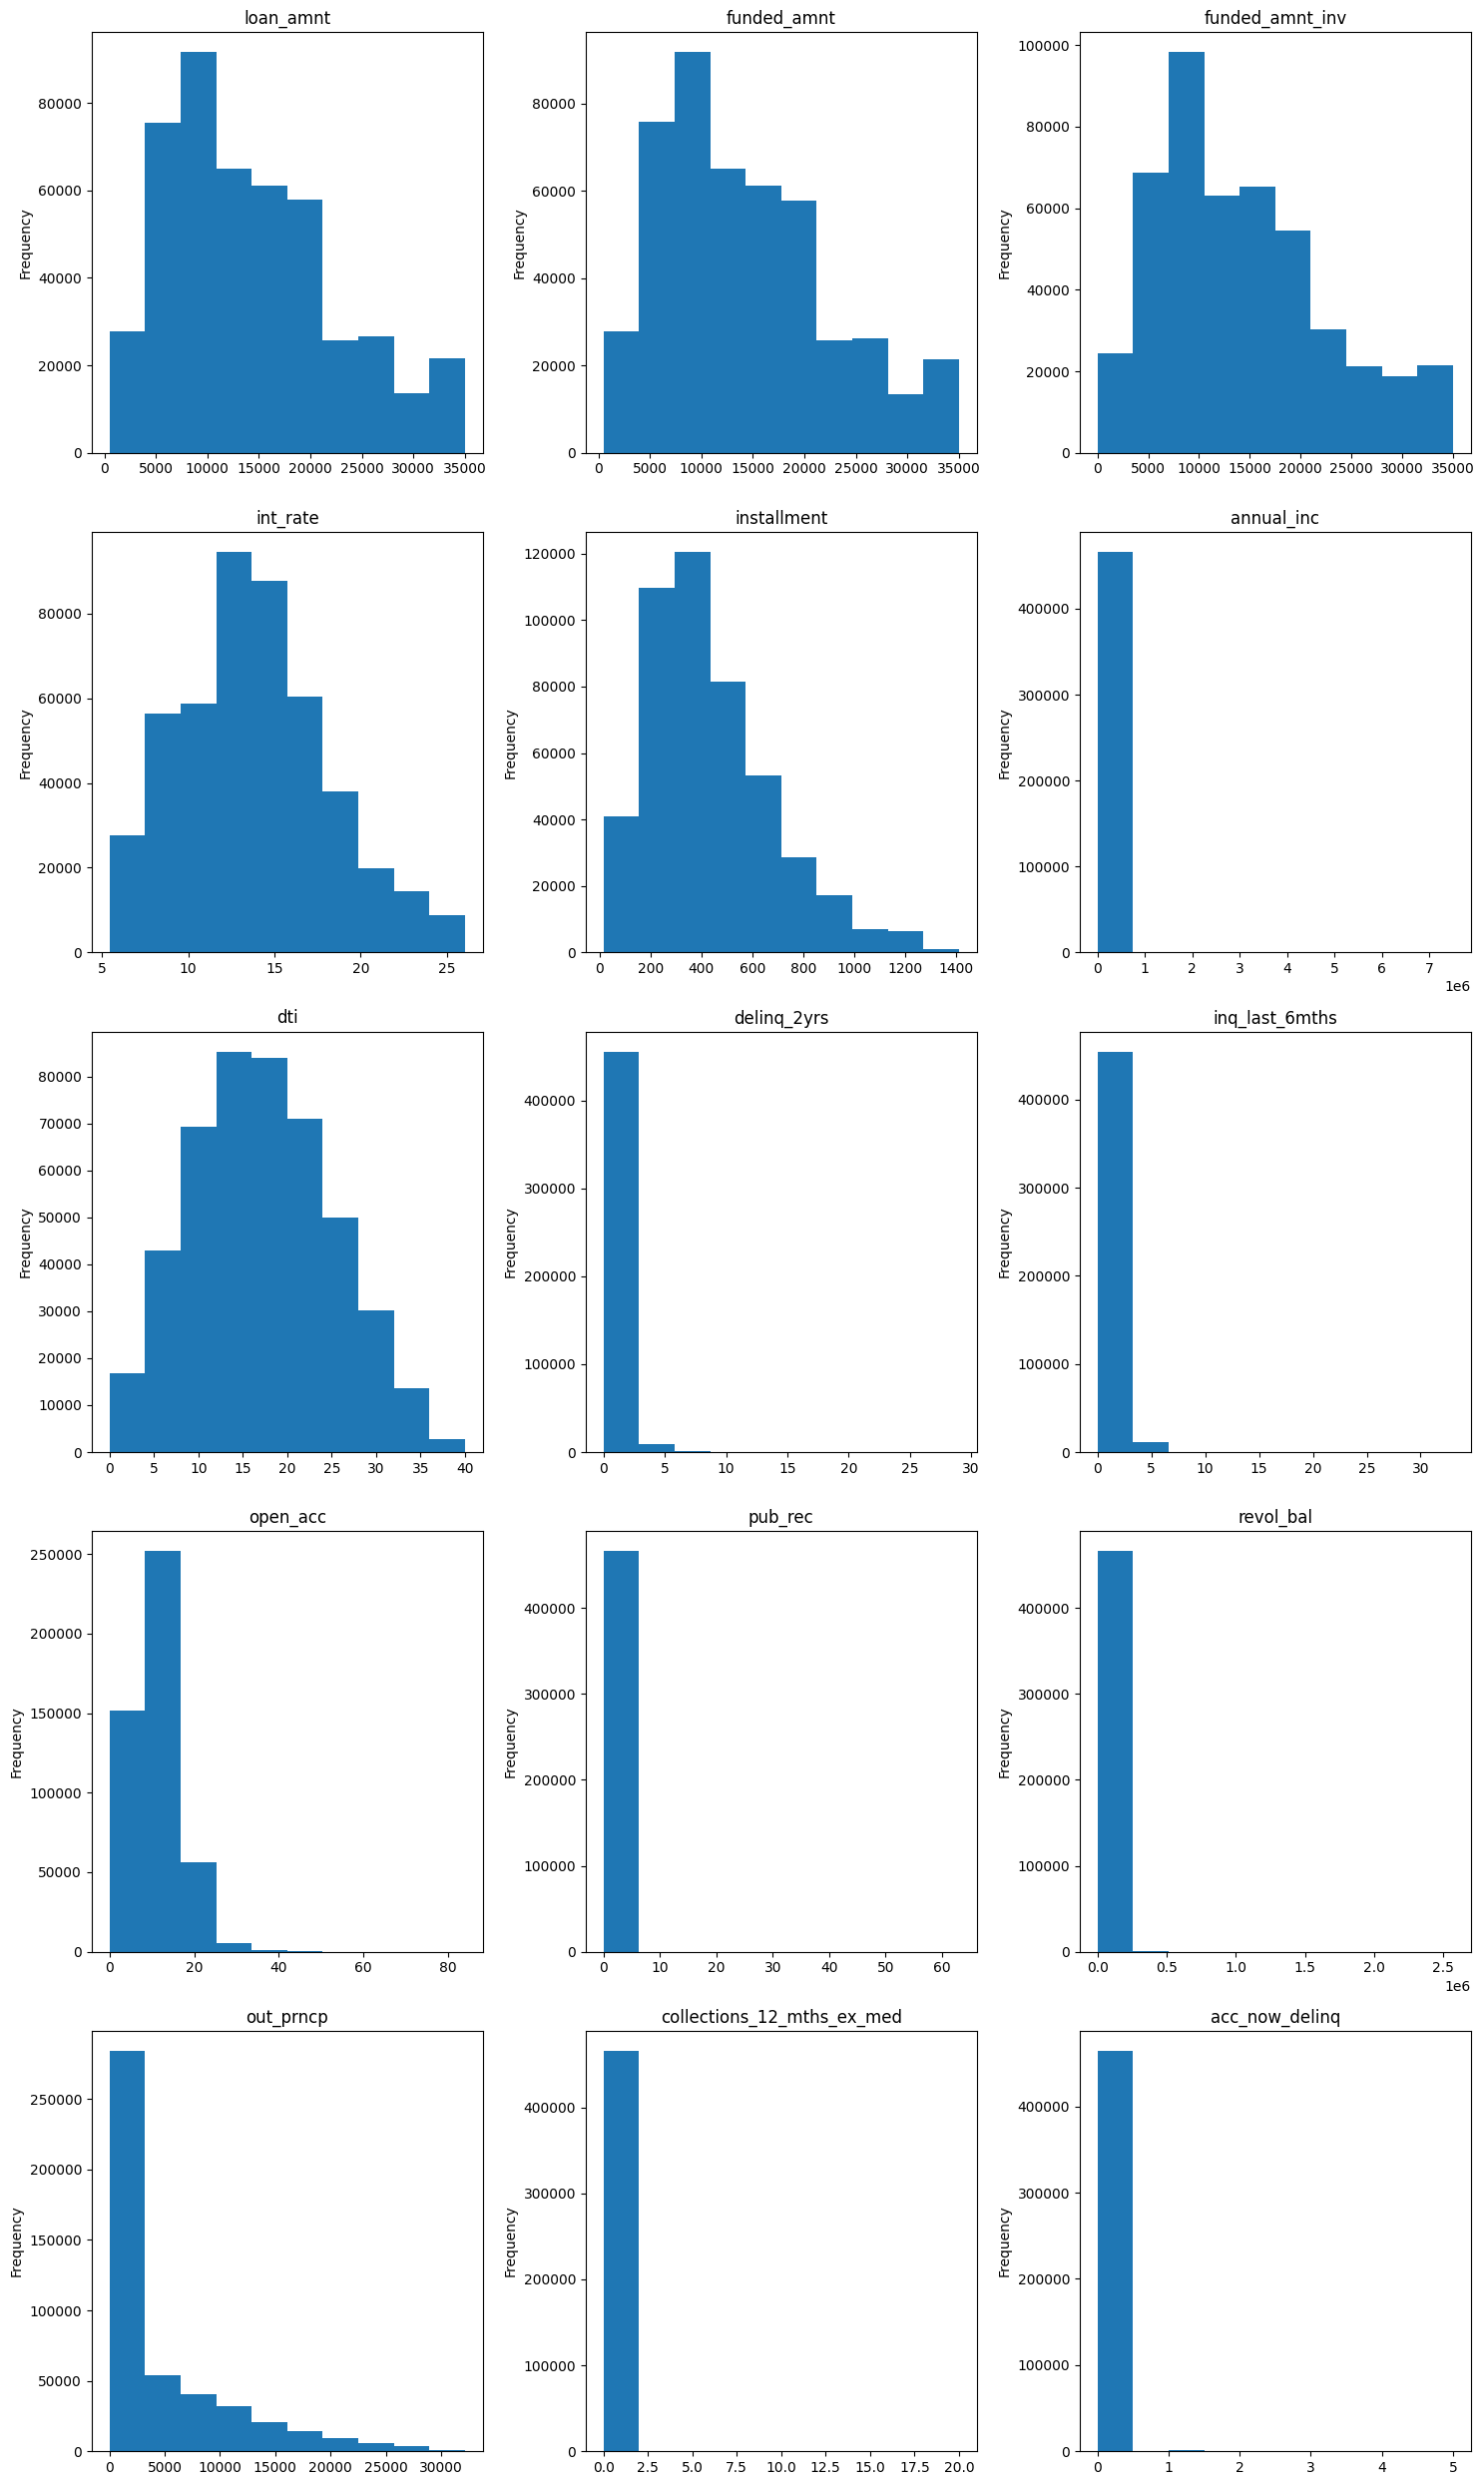

In [ ]:
# Get the names of all columns with data type 'int'
int_vars = df_filtered.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable
for i, var in enumerate(int_vars):
    df_filtered[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

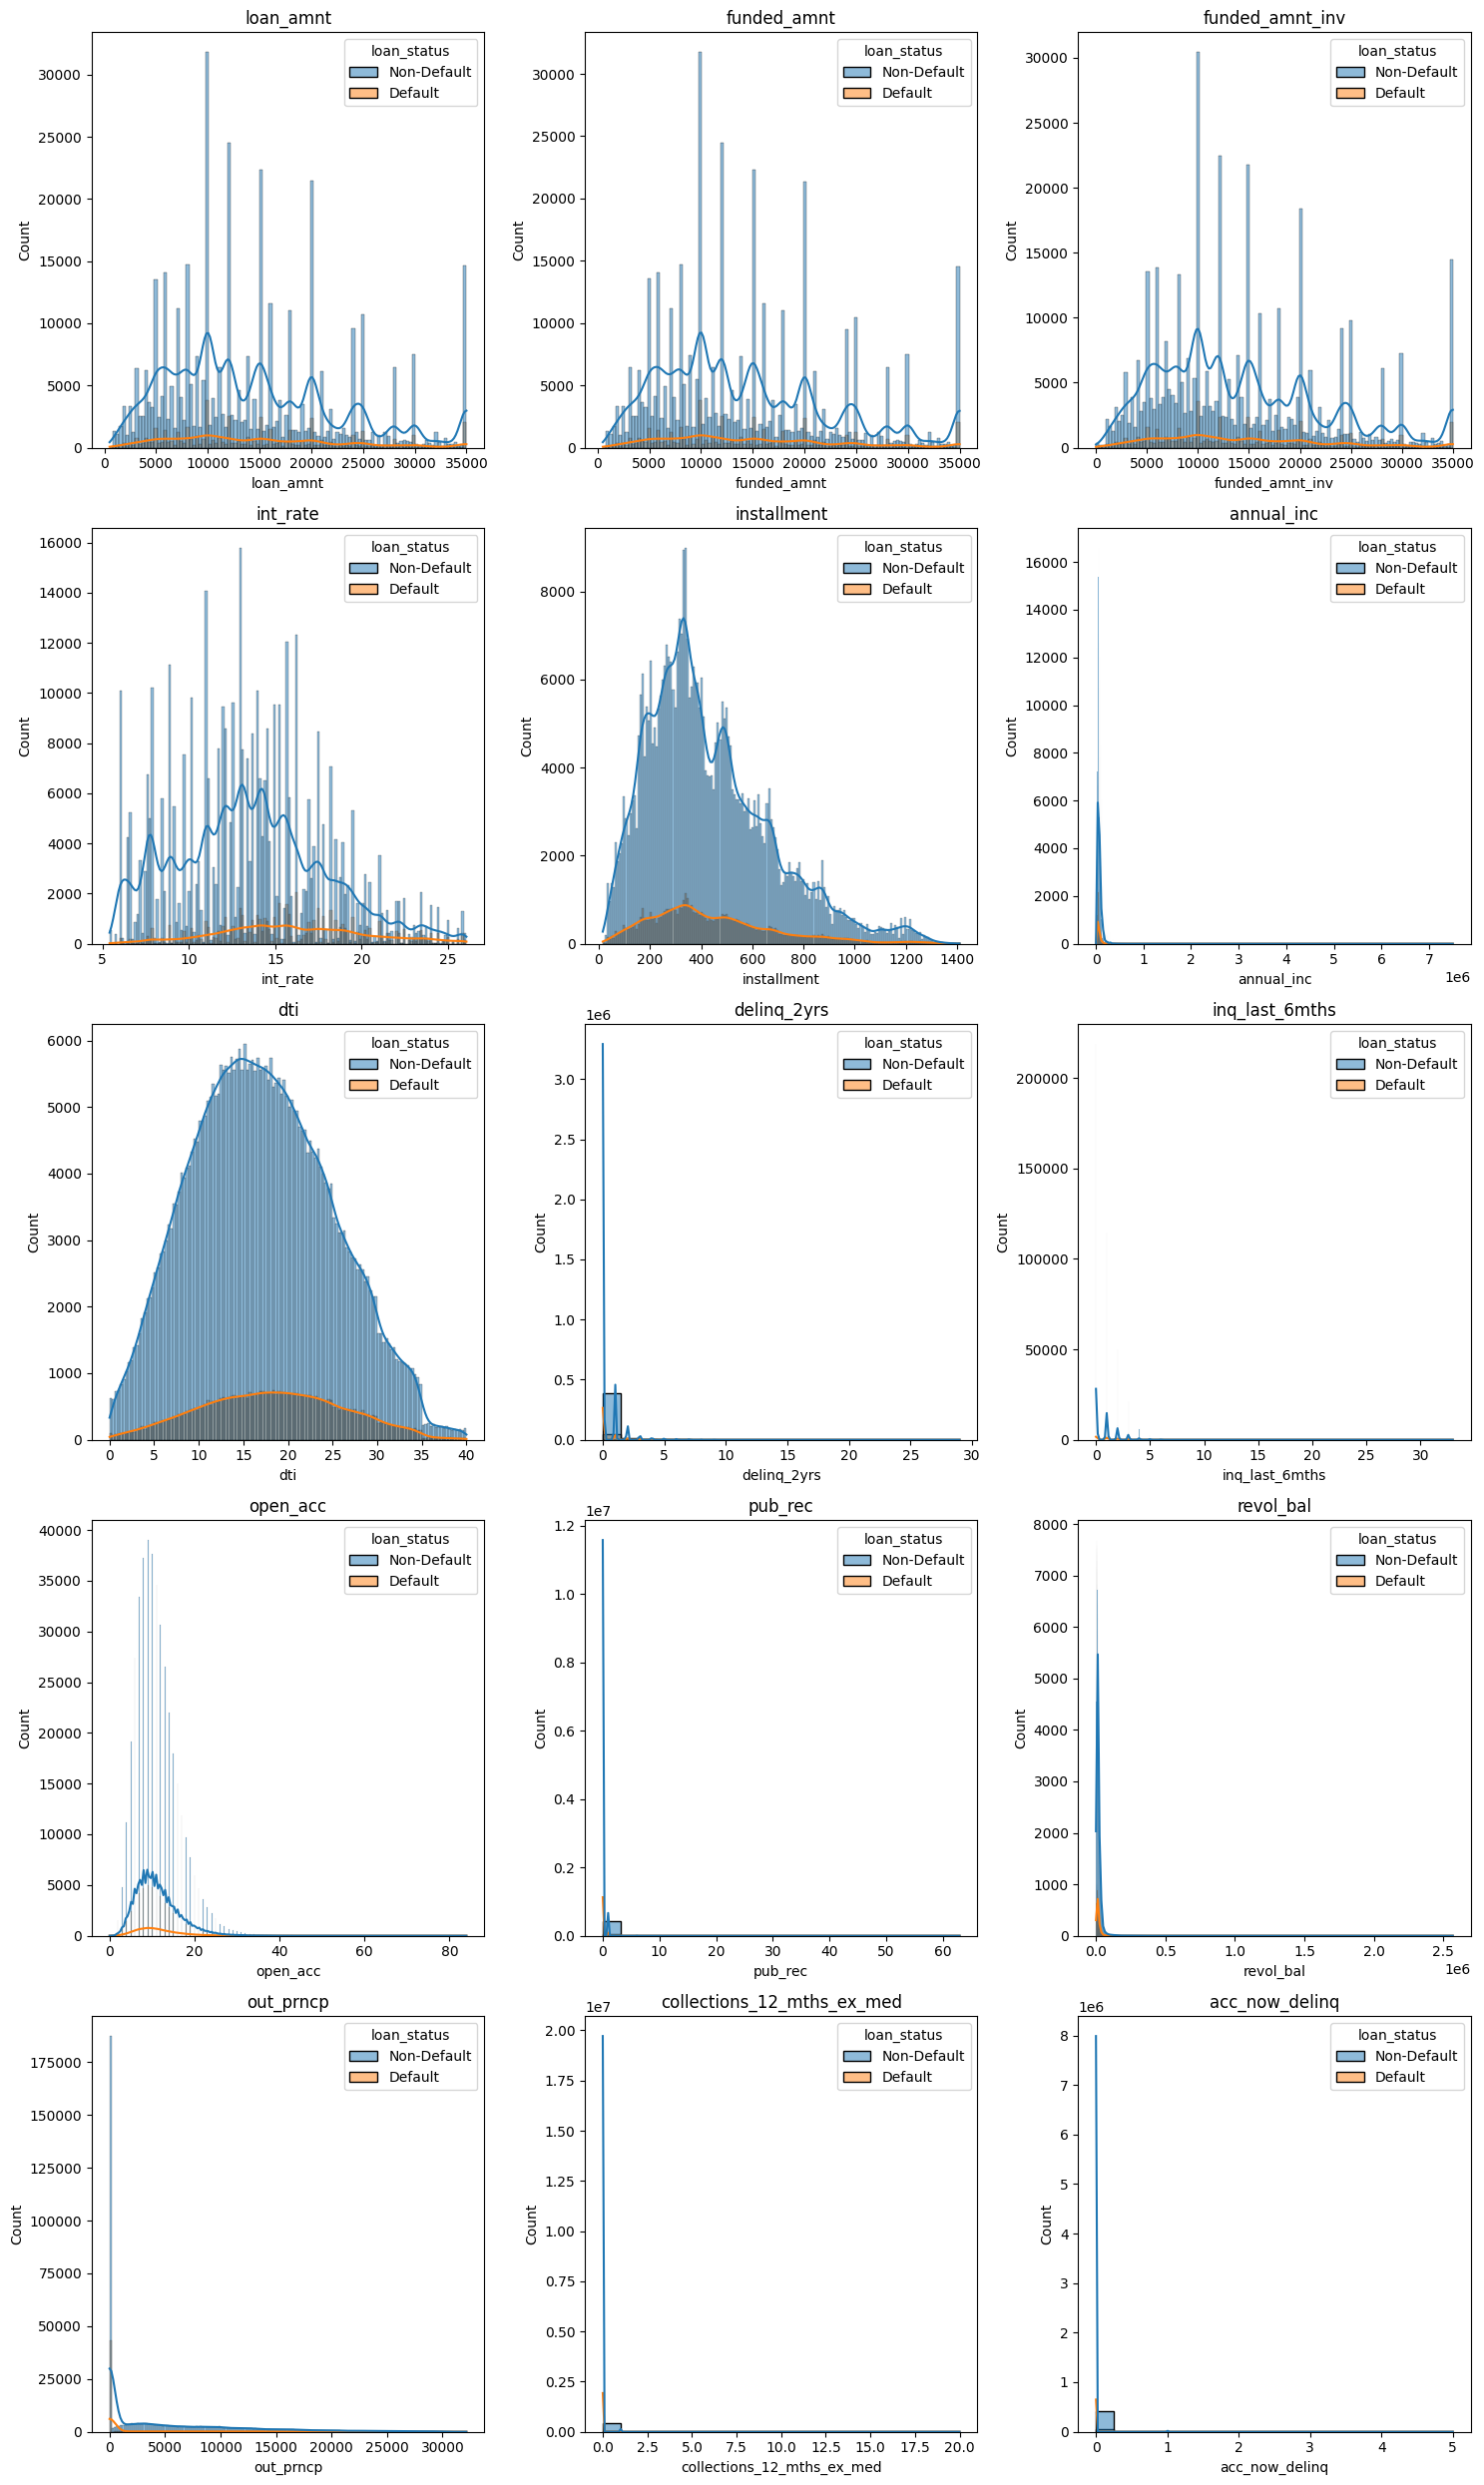

In [ ]:
# Get the names of all columns with data type 'int'
int_vars = df_filtered.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable with hue='loan_status'
for i, var in enumerate(int_vars):
    sns.histplot(data=df_filtered, x=var, hue='loan_status', kde=True, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

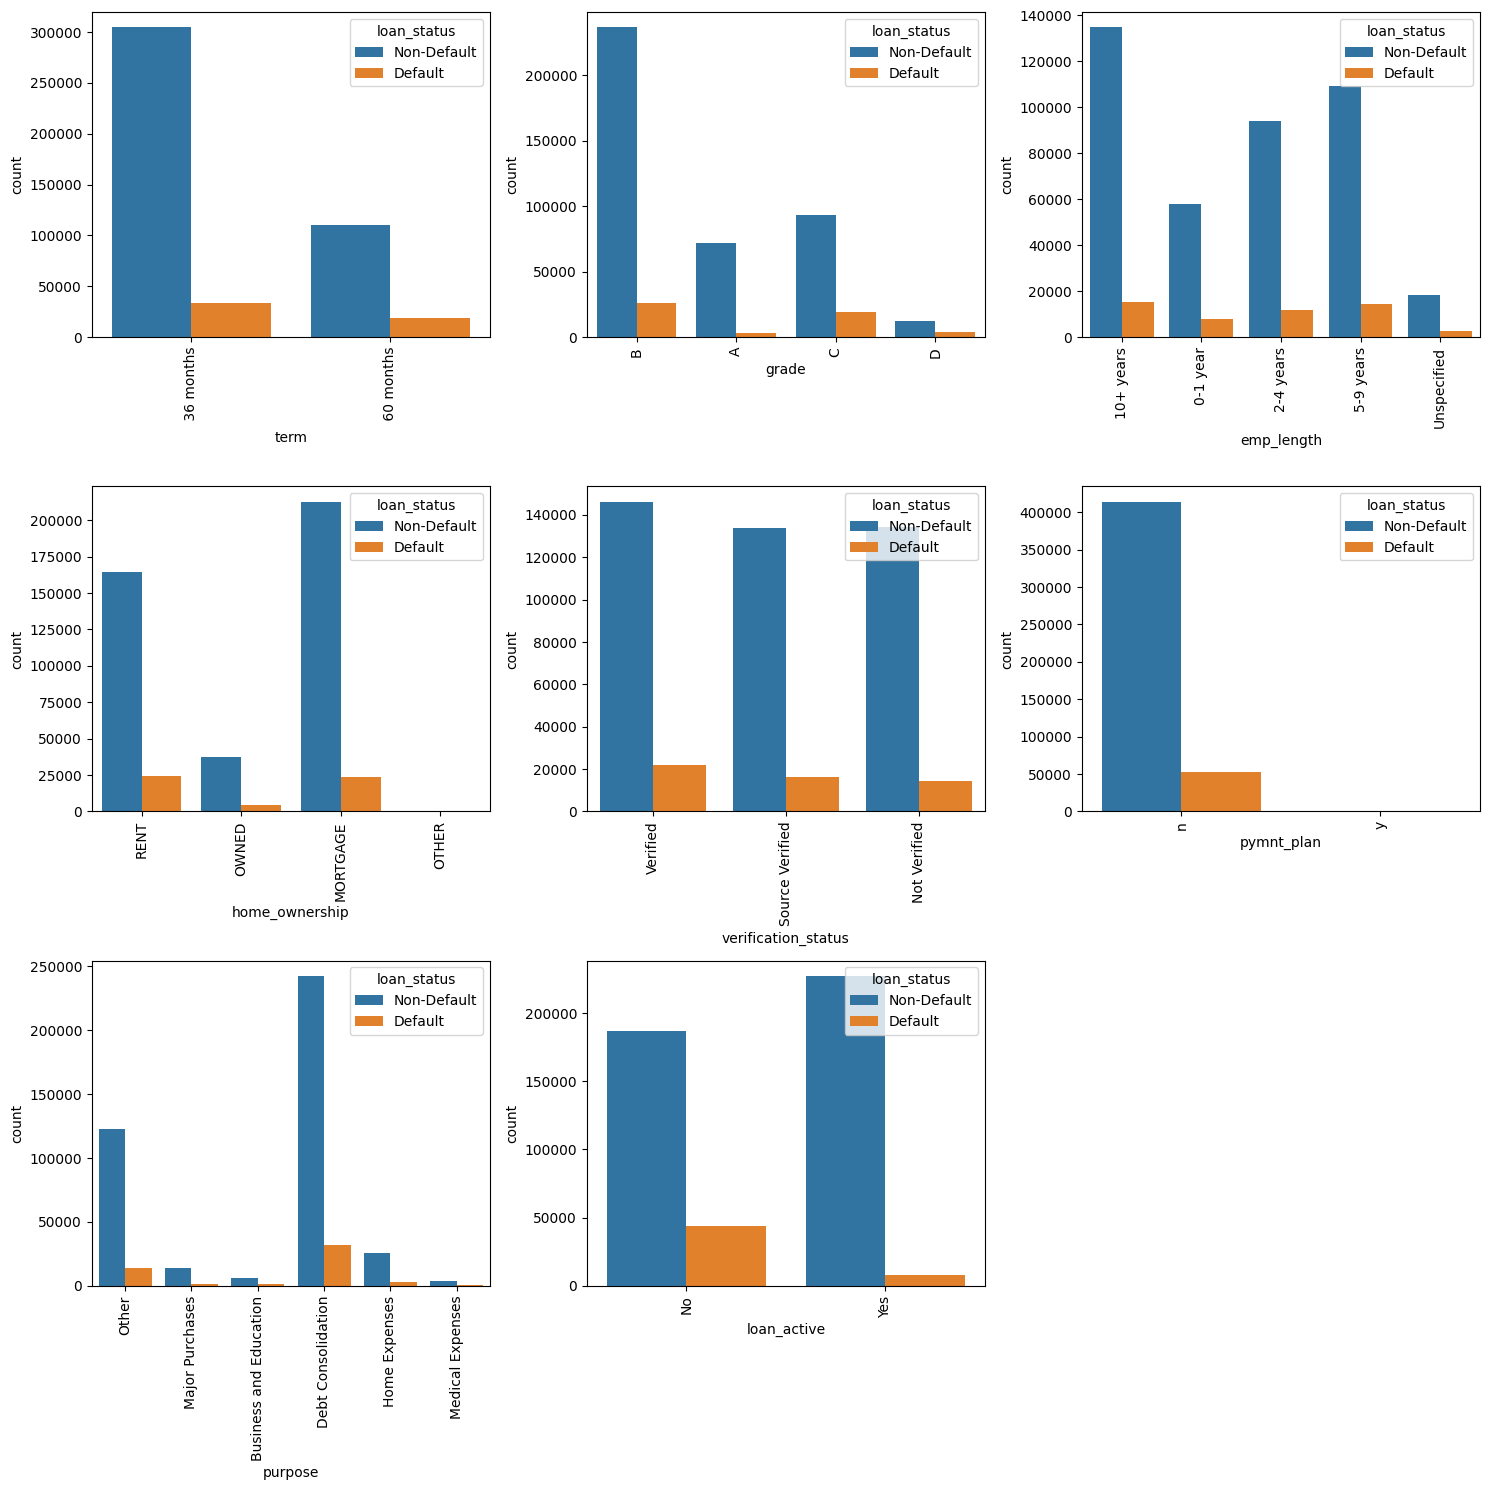

In [ ]:
# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = df_filtered.select_dtypes(include=['object']).columns.tolist()

# Exclude 'loan_status' from the list if it exists in cat_vars
if 'loan_status' in cat_vars:
    cat_vars.remove('loan_status')

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for each categorical variable
for i, var in enumerate(cat_vars):
    filtered_df = df_filtered[df_filtered[var].notnull()]  # Exclude rows with NaN values in the variable
    sns.countplot(x=var, hue='loan_status', data=filtered_df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

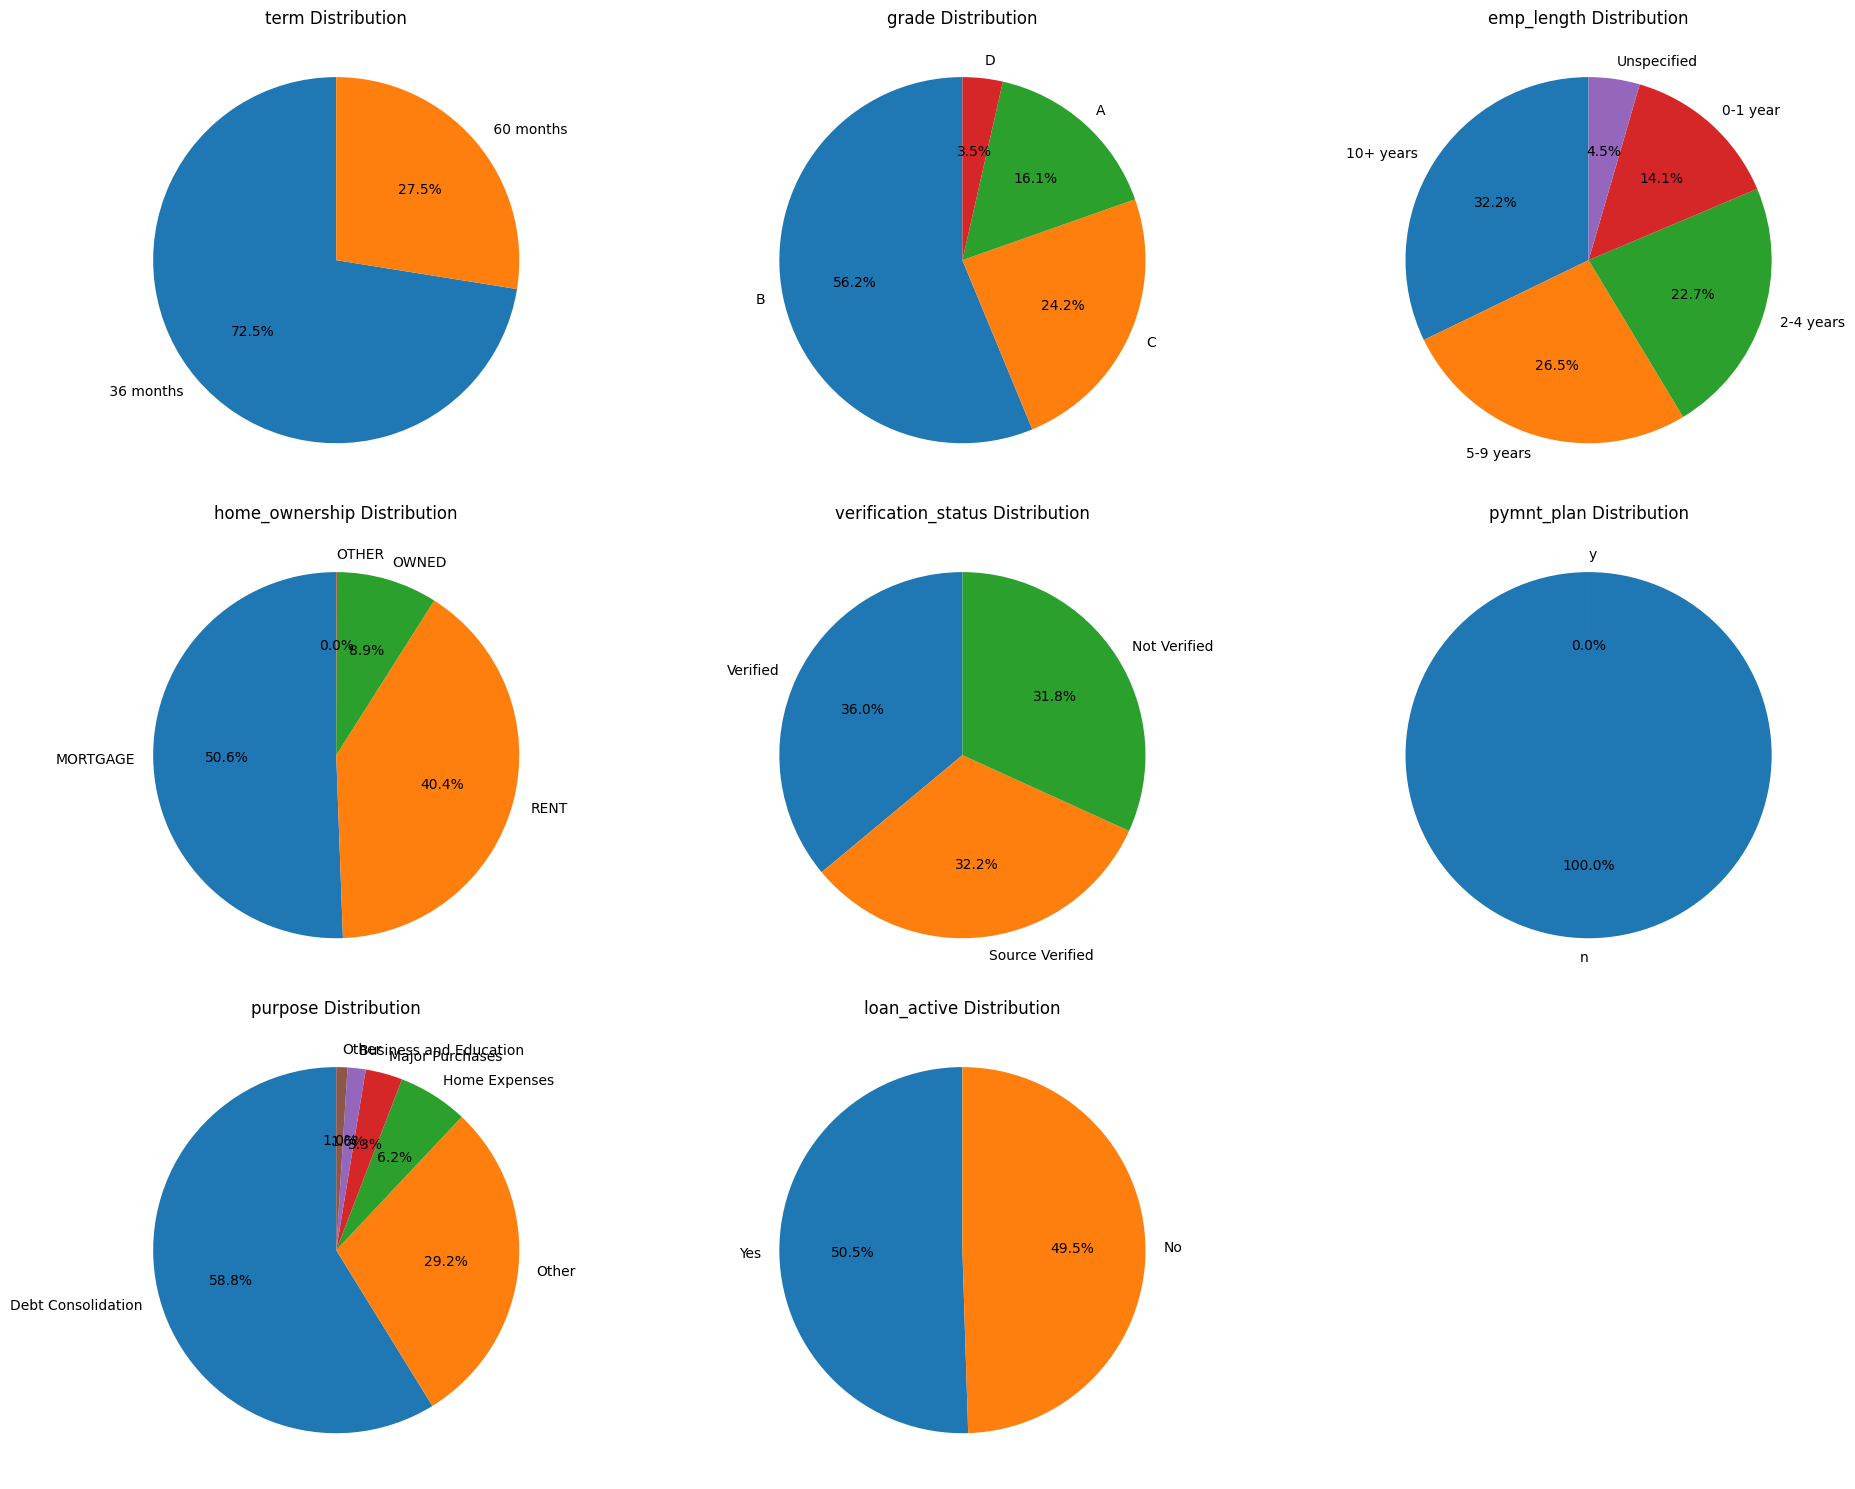

In [ ]:
# Specify the maximum number of categories to show individually
max_categories = 5

# Filter categorical columns with 'object' data type
cat_cols = [col for col in df_filtered.columns if col != 'loan_status' and df_filtered[col].dtype == 'object']

# Create a figure with subplots
num_cols = len(cat_cols)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5*num_rows))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Create a pie chart for each categorical column
for i, col in enumerate(cat_cols):
    if i < len(axs):  # Ensure we don't exceed the number of subplots
        # Count the number of occurrences for each category
        cat_counts = df_filtered[col].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)

        # Create a pie chart
        axs[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs[i].set_title(f'{col} Distribution')

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

In [ ]:
df_filtered.pymnt_plan.value_counts()

n    466276
y         9
Name: pymnt_plan, dtype: int64

# Data Preprocessing part 2

In [ ]:
# Drop pymnt_plan column because 1 unique value is too larger than the other (almost 100%)
df_filtered.drop(columns = 'pymnt_plan', inplace=True)
df_filtered.shape

(466285, 23)

In [ ]:
# Check the amounnt of missing value
check_missing = df_filtered.isnull().sum() * 100 / df_filtered.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

collections_12_mths_ex_med    0.031097
delinq_2yrs                   0.006219
inq_last_6mths                0.006219
open_acc                      0.006219
pub_rec                       0.006219
acc_now_delinq                0.006219
annual_inc                    0.000858
dtype: float64

In [ ]:
# Fill the missing value with median value of each column
df_filtered['collections_12_mths_ex_med'].fillna(df_filtered['collections_12_mths_ex_med'].median(), inplace=True)
df_filtered['delinq_2yrs'].fillna(df_filtered['delinq_2yrs'].median(), inplace=True)
df_filtered['inq_last_6mths'].fillna(df_filtered['inq_last_6mths'].median(), inplace=True)
df_filtered['open_acc'].fillna(df_filtered['open_acc'].median(), inplace=True)
df_filtered['pub_rec'].fillna(df_filtered['pub_rec'].median(), inplace=True)
df_filtered['acc_now_delinq'].fillna(df_filtered['acc_now_delinq'].median(), inplace=True)
df_filtered['annual_inc'].fillna(df_filtered['annual_inc'].median(), inplace=True)

In [ ]:
df_filtered.shape

(466285, 23)

# Label Encoding for Object Data Type

In [ ]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df_filtered.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df_filtered[col].unique()}")

term: [' 36 months' ' 60 months']
grade: ['B' 'A' 'C' 'D']
emp_length: ['10+ years' '0-1 year' '2-4 years' '5-9 years' 'Unspecified']
home_ownership: ['RENT' 'OWNED' 'MORTGAGE' 'OTHER']
verification_status: ['Verified' 'Source Verified' 'Not Verified']
loan_status: ['Non-Default' 'Default']
purpose: ['Other' 'Major Purchases' 'Business and Education' 'Debt Consolidation'
 'Home Expenses' 'Medical Expenses']
loan_active: ['No' 'Yes']


In [ ]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df_filtered.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df_filtered[col].unique())

    # Transform the column using the encoder
    df_filtered[col] = label_encoder.transform(df_filtered[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df_filtered[col].unique()}")

term: [0 1]
grade: [1 0 2 3]
emp_length: [1 0 2 3 4]
home_ownership: [3 2 0 1]
verification_status: [2 1 0]
loan_status: [1 0]
purpose: [5 3 0 1 2 4]
loan_active: [0 1]


<Axes: >

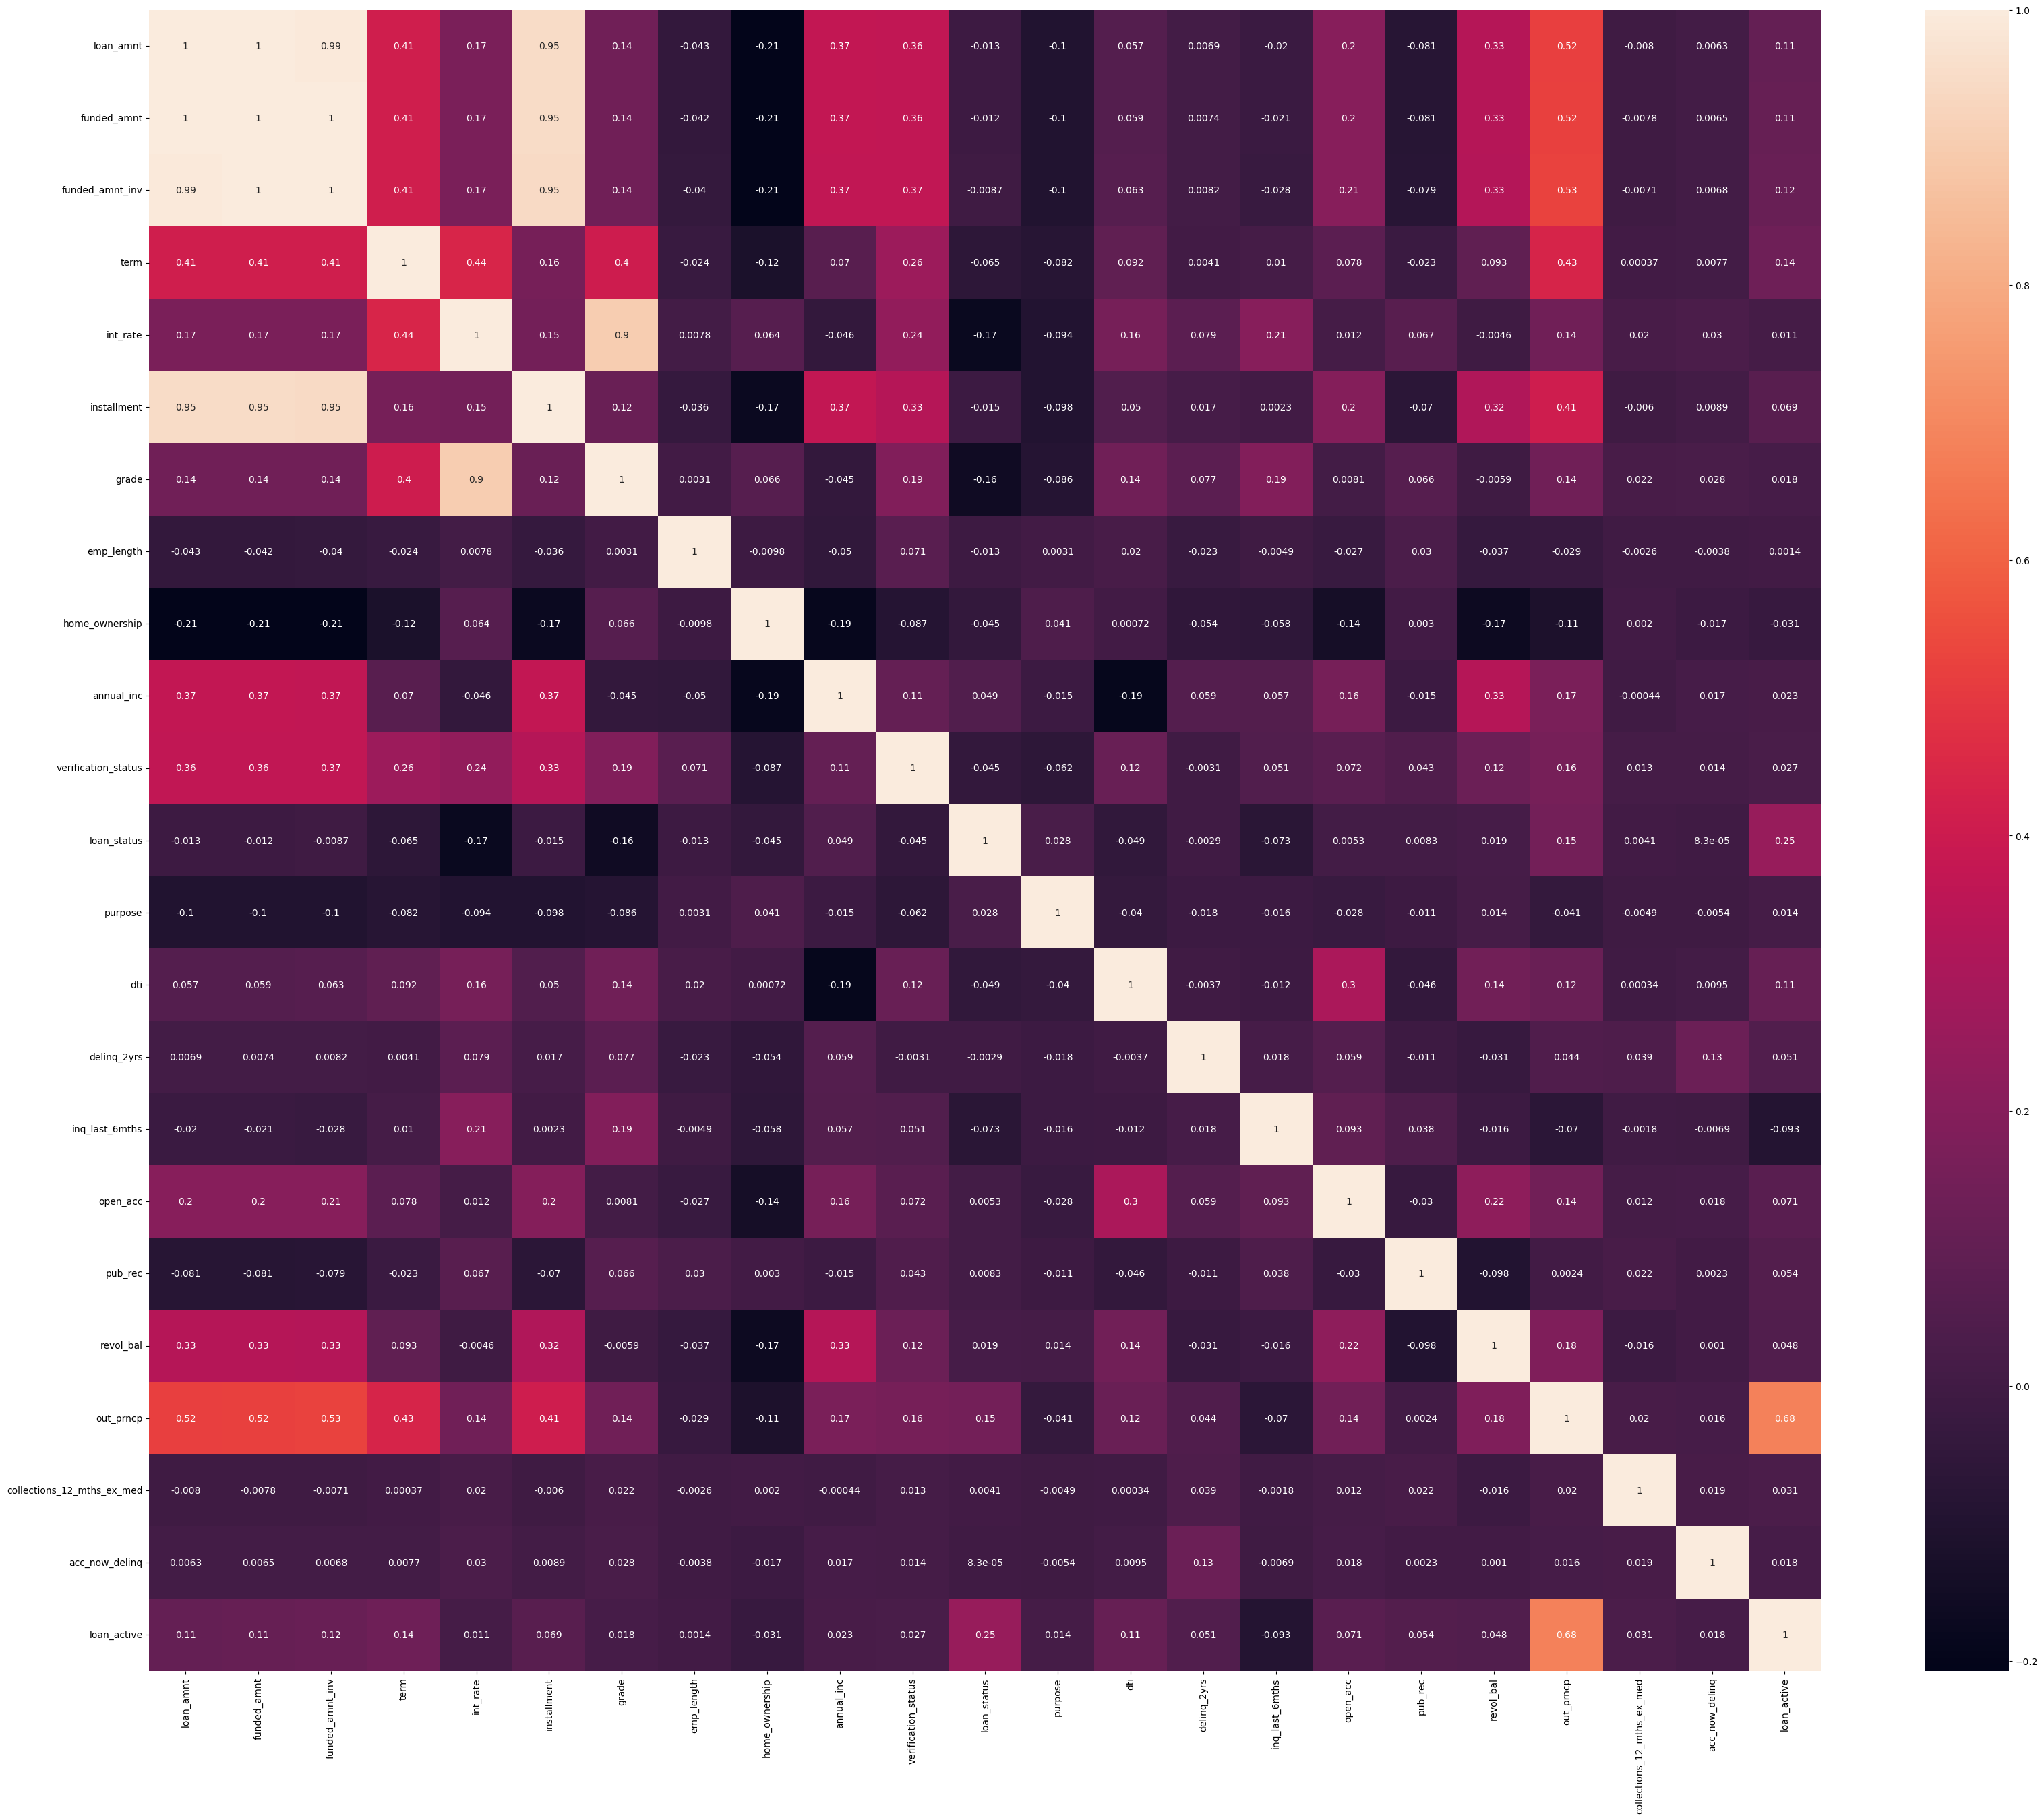

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(df_filtered.corr(), fmt='.2g', annot=True)

In [ ]:
# Drop 'funded_amnt', 'funded_amnt_inv', 'installment', column because it have high correlation with loan_amnt
# Drop 'int_rate' column because it have high correlation with grade
df_filtered.drop(columns = ['funded_amnt', 'funded_amnt_inv', 'installment','int_rate'], inplace=True)
df_filtered.shape

(466285, 19)

In [ ]:
df_filtered.head(7)

,loan_amnt,term,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,out_prncp,collections_12_mths_ex_med,acc_now_delinq,loan_active
0,5000,0,1,1,3,24000.0,2,1,5,27.65,0.0,1.0,3.0,0.0,13648,0.00,0.0,0.0,0
1,2500,1,1,0,3,30000.0,1,0,3,1.00,0.0,5.0,3.0,0.0,1687,0.00,0.0,0.0,0
2,2400,0,1,1,3,12252.0,0,1,0,8.72,0.0,2.0,2.0,0.0,2956,0.00,0.0,0.0,0
3,10000,0,1,1,3,49200.0,1,1,5,20.00,0.0,1.0,10.0,0.0,5598,0.00,0.0,0.0,0
4,3000,1,1,0,3,80000.0,1,1,5,17.94,0.0,0.0,15.0,0.0,27783,766.90,0.0,0.0,1
5,5000,0,0,2,3,36000.0,1,1,5,11.20,0.0,3.0,9.0,0.0,7963,0.00,0.0,0.0,0
6,7000,1,1,3,3,47004.0,0,1,1,23.51,0.0,1.0,7.0,0.0,17726,1889.15,0.0,0.0,1


<Axes: >

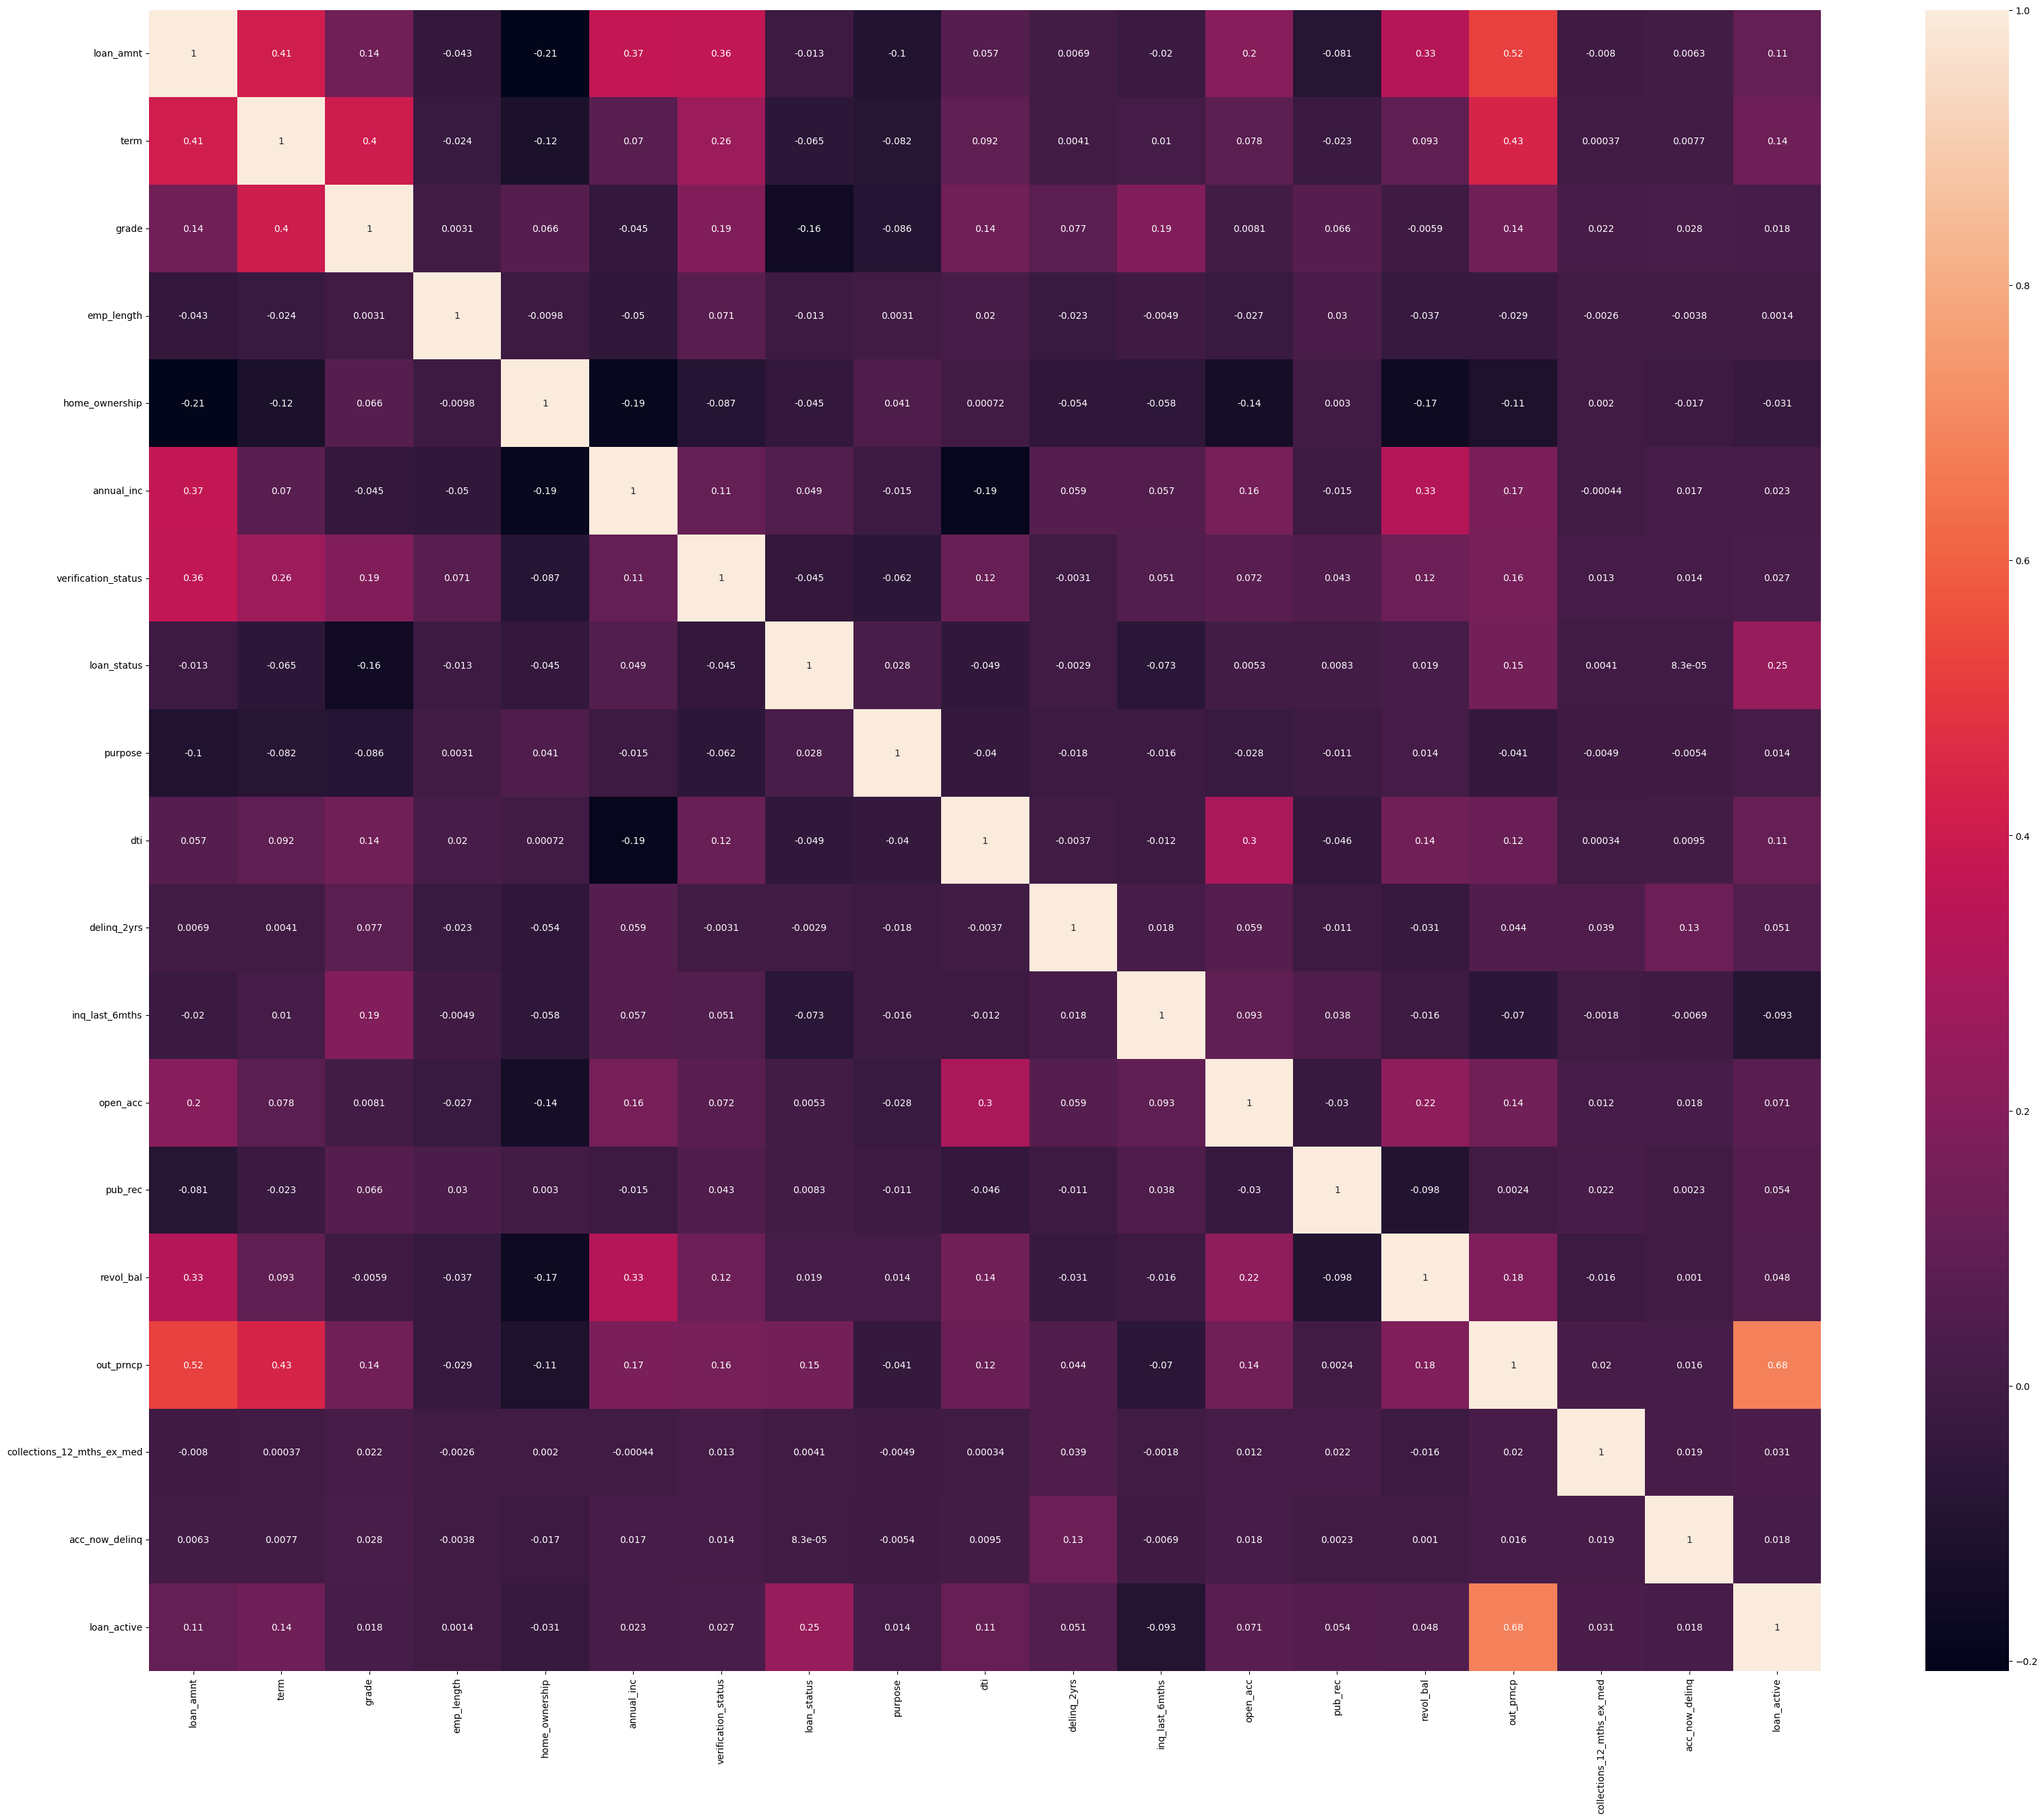

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(df_filtered.corr(), fmt='.2g', annot=True)

# Train Test Split

In [ ]:
X = df_filtered.drop('loan_status', axis=1)
y = df_filtered['loan_status']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [ ]:
df_filtered.columns

Index(['loan_amnt', 'term', 'grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'out_prncp', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'loan_active'],
      dtype='object')

In [ ]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['annual_inc', 'delinq_2yrs', 'inq_last_6mths',
                    'open_acc', 'pub_rec', 'revol_bal',
                    'collections_12_mths_ex_med','acc_now_delinq']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# Data Modelling

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

dt = DecisionTreeClassifier(random_state=42,class_weight='balanced')
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': list(range(1, 21)),
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 11)),
}
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Hyperparameter Terbaik:", random_search.best_params_)

Hyperparameter Terbaik: {'splitter': 'best', 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 18, 'criterion': 'gini'}


Hasil Random Search: {'splitter': 'best', 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 18, 'criterion': 'gini'}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definisi hyperparameter yang akan diuji
dt_grid = DecisionTreeClassifier(class_weight='balanced', criterion='gini', splitter='best', random_state=42)
param_grid = {
    'max_depth': [18,25,30],
    'min_samples_split': [3,9,15],
    'min_samples_leaf': [3,5,11]
}

# Inisialisasi GridSearchCV
grid_search1 = GridSearchCV(dt_grid, param_grid=param_grid, cv=5, n_jobs=-1)

# Melakukan tuning pada model
grid_search1.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Hyperparameter Terbaik (GridSearchCV - Tahap 1):", grid_search1.best_params_)

Hyperparameter Terbaik (GridSearchCV - Tahap 1): {'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 3}


Hasil Grid Search I : {'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 3}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_tuned = DecisionTreeClassifier(class_weight='balanced', criterion='gini', splitter='best', random_state=42,
                                  max_depth=30, min_samples_leaf=3, min_samples_split=3)
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=30,
                       min_samples_leaf=3, min_samples_split=3,
                       random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = dt_tuned.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 77.35 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='binary')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='binary')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='binary')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='binary')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8658421156277196
Precision Score :  0.9136735979836169
Recall Score :  0.8227695279488109
Jaccard Score :  0.7634229127692704
Log Loss :  8.162453391431905


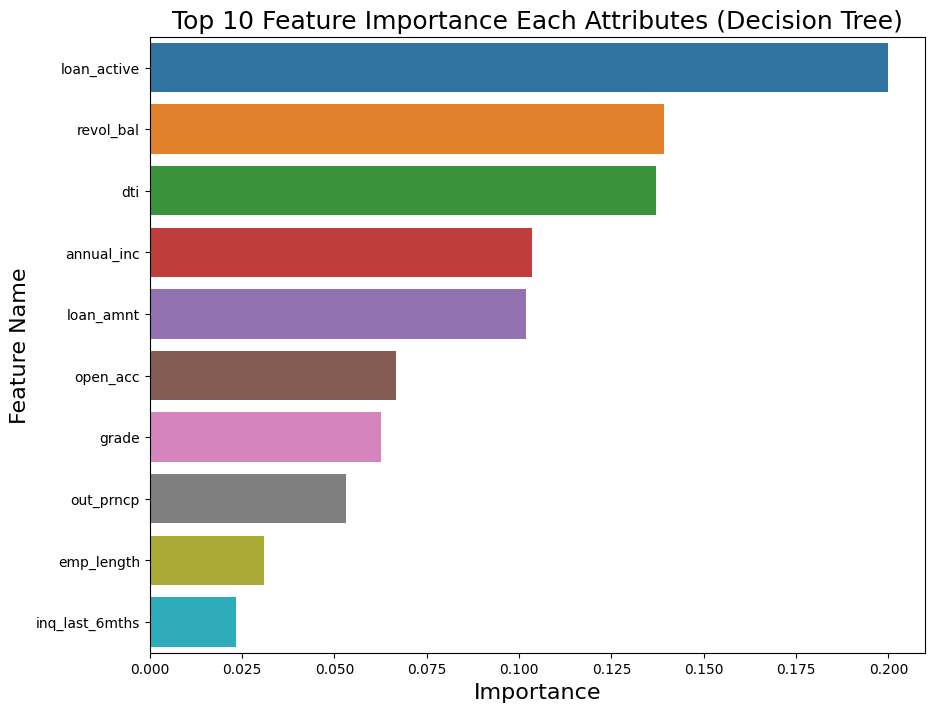

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dt_tuned.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.7735397878979594')

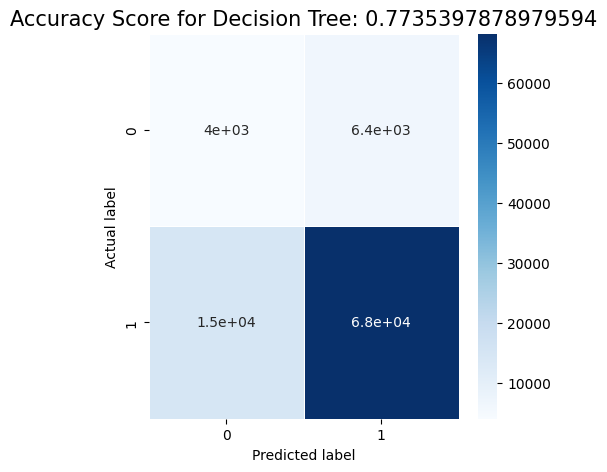

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dt_tuned.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

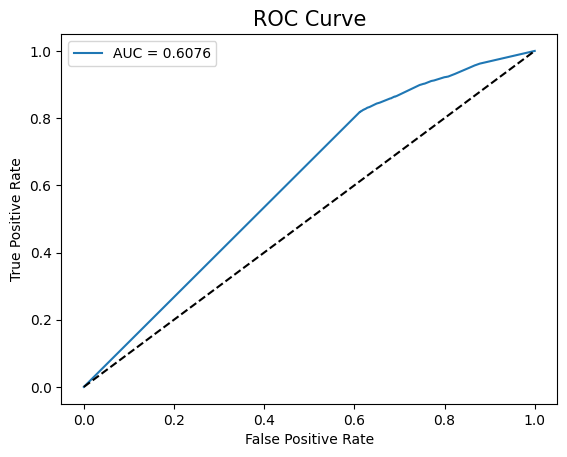

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dt_tuned.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_random = RandomForestClassifier(class_weight='balanced', random_state=42)
param_dist = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 50, 100, 200],
    'max_depth': list(range(1, 21)),
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 11)),
}
random_search = RandomizedSearchCV(rf_random, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Random Search Best Param:", random_search.best_params_)

Random Search Best Param: {'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_depth': 18, 'criterion': 'entropy'}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_nontuned = RandomForestClassifier(class_weight='balanced', criterion='gini', random_state=42,
                                  n_estimators=100)
rf_nontuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = rf_nontuned.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 88.97 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='binary')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='binary')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='binary')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='binary')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.9413094354700611
Precision Score :  0.8927457773928107
Recall Score :  0.9954605819147652
Jaccard Score :  0.889126121463078
Log Loss :  3.973973472735586


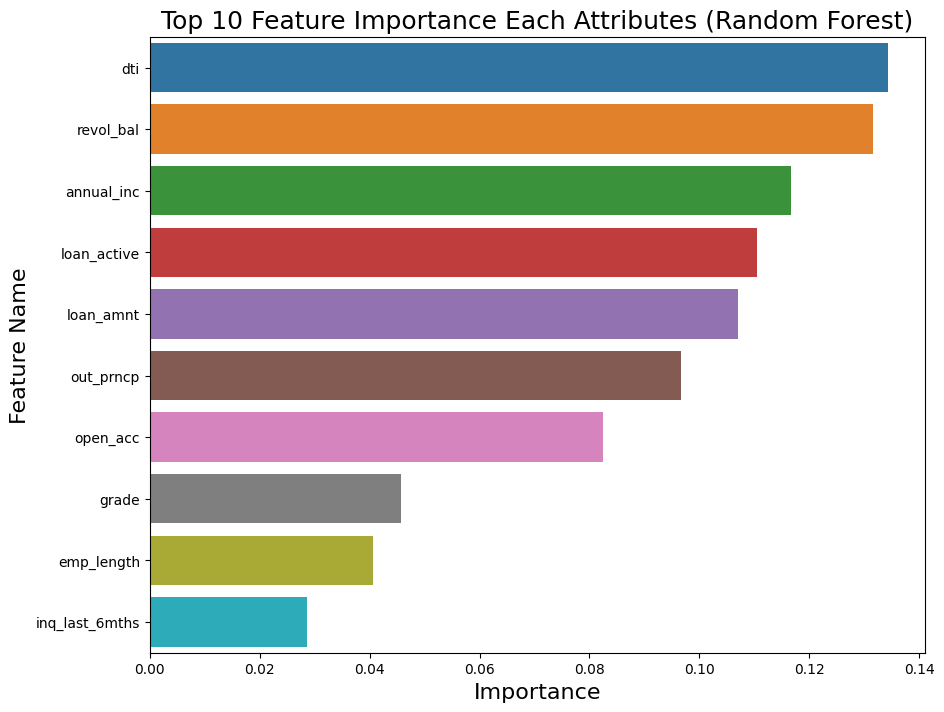

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rf_nontuned.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.8897455418896169')

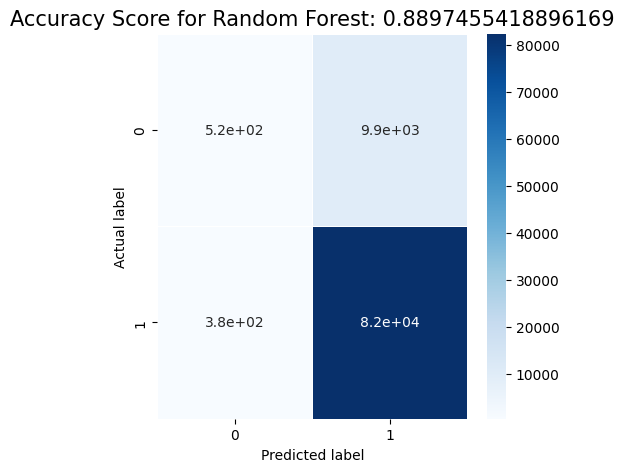

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rf_nontuned.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

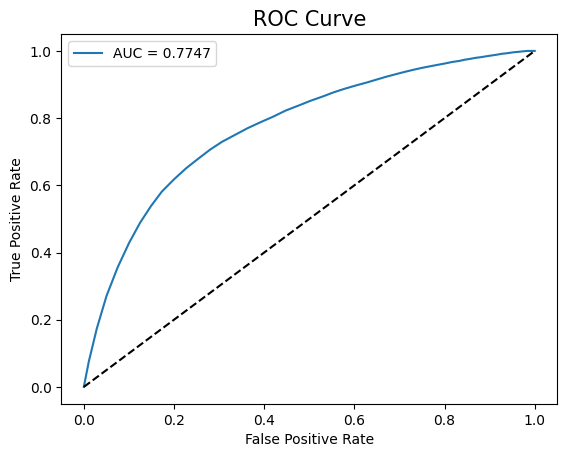

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rf_nontuned.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

## XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb_random = XGBClassifier( random_state=42)
param_dist = {
    'n_estimators': [100,300,500,800],
    'max_depth' : [3,4,5,6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'min_child_weight':[1,2,3,4]
}
random_search = RandomizedSearchCV(xgb_random, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Random Search Best Param:", random_search.best_params_)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Random Search Best Param: {'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.1}


Random Search Best Param: {'n_estimators': 800, 'min_child_weight': 0.1, 'max_depth': 3, 'learning_rate': 0.1}

In [ ]:
xgb_nontuned = XGBClassifier(random_state=42,min_child_weight=3,
                             max_depth=6, n_estimators=300, learning_rate=0.1)
xgb_nontuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = xgb_nontuned.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 89.03 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='binary')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='binary')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='binary')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='binary')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.9415474252420529
Precision Score :  0.8935436656366889
Recall Score :  0.995001810938066
Jaccard Score :  0.8895508856004922
Log Loss :  3.9550350657949087


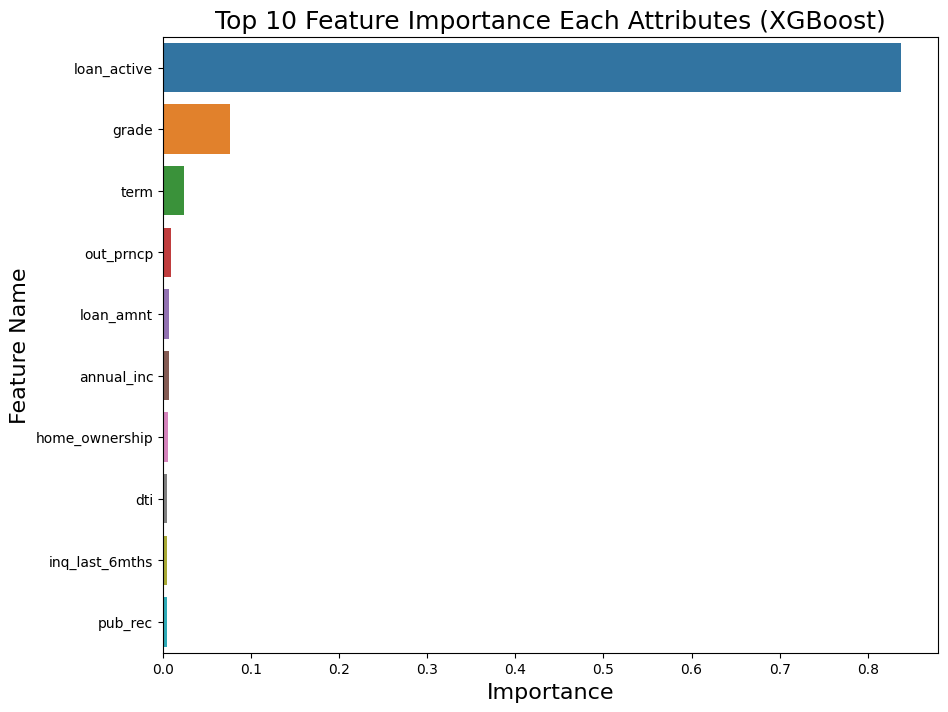

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": xgb_nontuned.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (XGBoost)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score for XGBoost: 0.8902709716160717')

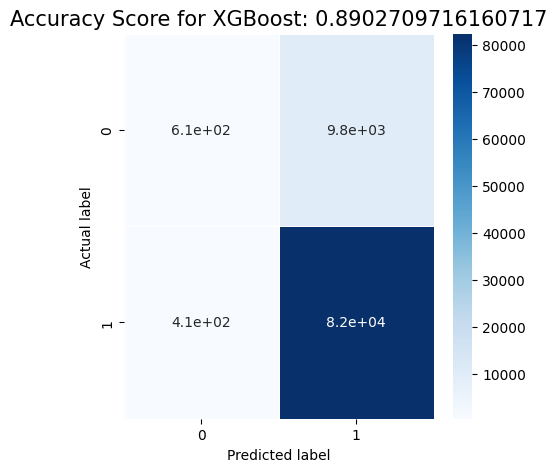

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for XGBoost: {0}'.format(xgb_nontuned.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

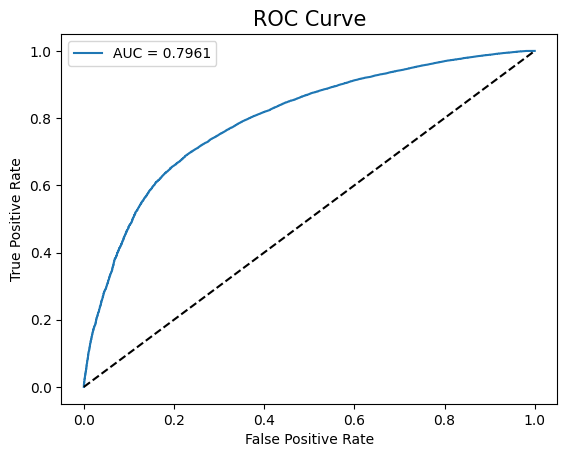

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = xgb_nontuned.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# Comparison Each Models

In [ ]:
models = ['Decision Tree', 'Random Forest', 'XGBoost',]
roc_auc = [0.6076, 0.7747, 0.7961]
accuracy =[0.773539,0.889745,0.890270 ]
f1 =[0.865842, 0.941309, 0.941547]
precision =[0.913673, 0.892745, 0.893543]
recall=[0.822769, 0.995460,  0.995002]
jaccard=[0.763422, 0.889126, 0.889550]

eval_df = pd.DataFrame({
    'Model' : models,
    'ROC AUC Score' : roc_auc,
    'Accuracy Score' : accuracy,
    'F1-Score' : f1,
    'Precision Score' : precision,
    'Recall Score' : recall,
    'Jaccard Score' : jaccard
})
eval_df

,Model,ROC AUC Score,Accuracy Score,F1-Score,Precision Score,Recall Score,Jaccard Score
0,Decision Tree,0.6076,0.773539,0.865842,0.913673,0.822769,0.763422
1,Random Forest,0.7747,0.889745,0.941309,0.892745,0.995460,0.889126
2,XGBoost,0.7961,0.890270,0.941547,0.893543,0.995002,0.889550


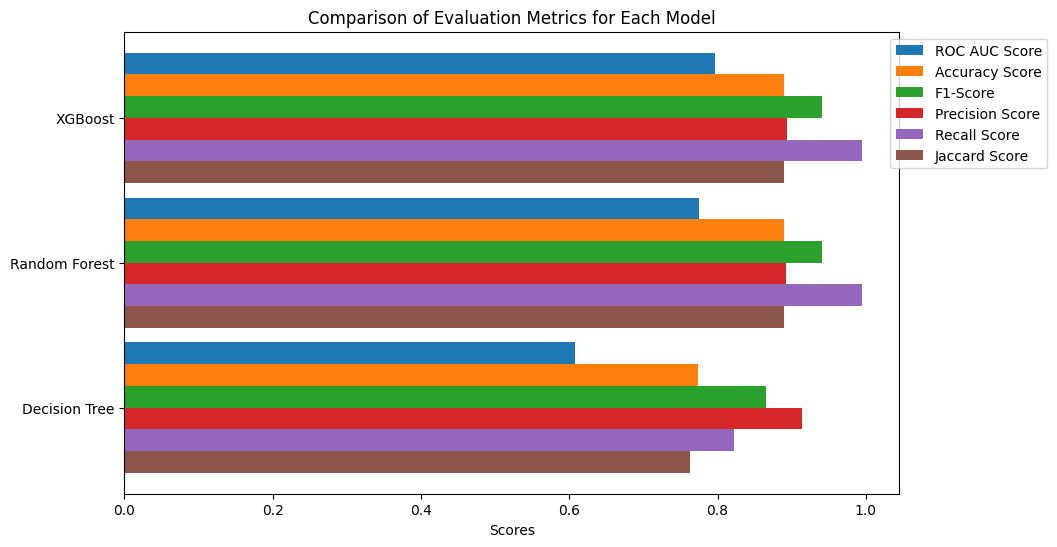

In [ ]:
# Membuat visualisasi
fig, ax = plt.subplots(figsize=(10, 6))

# Urutkan berdasarkan ROC AUC Score
eval_df = eval_df.sort_values(by=['ROC AUC Score', 'Accuracy Score', 'F1-Score', 'Precision Score', 'Recall Score', 'Jaccard Score'], ascending=False)

# Metrik yang ingin ditampilkan
metrics = ['ROC AUC Score', 'Accuracy Score', 'F1-Score', 'Precision Score', 'Recall Score', 'Jaccard Score']

# Jumlah model dan metrik
n_models = len(eval_df)
n_metrics = len(metrics)
width = 0.15

# Buat indeks untuk setiap model
model_indices = np.arange(n_models)

# Buat horizontal grouped bar chart untuk setiap metrik
for i, metric in enumerate(metrics):
    metric_scores = eval_df[metric]
    ax.barh(model_indices + (i - (n_metrics - 1) / 2) * width, metric_scores, width, label=metric)

# Tambahkan label sumbu dan judul
ax.set_xlabel('Scores')
ax.set_title('Comparison of Evaluation Metrics for Each Model')
ax.set_yticks(model_indices)
ax.set_yticklabels(eval_df['Model'])
ax.invert_yaxis()  # Membalik urutan model

# Tambahkan legenda
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Tampilkan plot
plt.show()